In [1]:
%run ./"0 Imports and functions.ipynb"
#
# Load cube information and result files
#
#
#

# Take the line information:


File_Descriptors_NGC = [
    "NGC_253_H13CN_J1-0_",
    "NGC_253_HCN_J1-0_",
    "NGC_253_H13CO+_J1-0_",
    "NGC_253_HCO+_J1-0_",
    "NGC_253_CO_J3-2_",
    "NGC_253_CO_J1-0_",
    "NGC_253_SiO_J2-1_",
    "NGC_253_H13CN_J4-3_",
    "NGC_253_HCN_J4-3_",
    "NGC_253_HCO+_J4-3_"
]

File_Descriptors_cmz = [
    "cmz_H13CN_J1_0_",
    "cmz_HCN_J1-0_",
    "cmz_H13COp_J1_0_",
    "cmz_3mm_HCO+_J1-0_",
    "cmz_CO_J3_2__",
    "cmz_CO_J1_0_",
    "cmz_SiO_J2_1_",
    "NOT AVAILABLE",
    "cmz_HCN_J4_3_",
    "NOT AVAILABLE"
]

#To get low delta data:
for i in range(len(File_Descriptors_cmz)):
    #File_Descriptors_cmz[i]+="Low_Delta_"
    pass
for i in range(len(File_Descriptors_NGC)):
    #File_Descriptors_NGC[i]+="Low_Delta_"
    pass

##################################
##################################
#Load cube info and result files
##################################

import pickle 


Cube_Information_NGC = []
Pointing_Information_NGC = []
Results_NGC=[]
# The fits, each fit has the [popt,pcov], (the fit and covariance matrix)
Fit_Results_NGC=[] #Fits: [Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All],[Radius_Luminosity_All],[CD_SL-Ratio]
i=0
for fd in File_Descriptors_NGC:
    try:
        print(i)
        with open("Spectral Cubes/Cube Information/"+fd+"_Cube_Information", 'rb') as file:

            Cube_Information_NGC.append( pickle.load(file))

        with open("Spectral Cubes/Cube Information/"+fd+"_Pointing_Information", 'rb') as file:

            Pointing_Information_NGC.append( pickle.load(file))

        File_Name = Cube_Information_NGC[i]['File_Name']

        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results", 'rb') as file:

            Results_NGC.append( pickle.load(file))

        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Fit_Results", 'rb') as file:

            Fit_Results_NGC.append( pickle.load(file))
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"LOADED")
        i+=1

    except:
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        Fit_Results_NGC.append(Fit_Results_NGC[0])
        print(fd,"FAILED")
        i+=1


        
Cube_Information_CMZ = []
Pointing_Information_CMZ = []
Results_CMZ=[] #Statistics: Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err
# The fits, each fit has the [popt,pcov], (the fit and covariance matrix)
Fit_Results_CMZ=[] #Fits: [Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All],[Radius_Luminosity_All],[CD_SL-Ratio] all for LS fits
i=0
for fd in File_Descriptors_cmz:
    try:
        print(i)
        if fd == "NOT AVAILABLE":
            File_Name = File_Descriptors_NGC[i] + "Is not available in the CMZ"
 


        with open("Spectral Cubes/Cube Information/"+fd+"_Cube_Information", 'rb') as file:

            Cube_Information_CMZ.append( pickle.load(file))

        with open("Spectral Cubes/Cube Information/"+fd+"_Pointing_Information", 'rb') as file:

            Pointing_Information_CMZ.append( pickle.load(file))

        File_Name = Cube_Information_CMZ[i]['File_Name']
        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results", 'rb') as file:
            
            Results_CMZ.append( pickle.load(file))
        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Fit_Results", 'rb') as file:

            Fit_Results_CMZ.append( pickle.load(file))

        i+=1
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"LOADED")
    except:
        Fit_Results_CMZ.append(copy.deepcopy(Fit_Results_CMZ[0]))
        Cube_Information_CMZ.append(Pointing_Information_CMZ[0])
        Pointing_Information_CMZ.append( Pointing_Information_CMZ[0])
        Results_CMZ.append( Results_CMZ[0])



        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"FAILED")
        i+=1




#%matplotlib widget 
#%matplotlib notebook


/home/ben/miniconda3/bin/python
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
astropy 5.1.dev153+gb740594dc
spectral_cube 0.6.1.dev22+g003ef16
spectral_cube file path /home/ben/.local/lib/python3.8/site-packages/spectral_cube/__init__.py
reproject 0.8
3.3.4 Matplotlib
/home/ben/miniconda3/lib/python3.8/site-packages/matplotlib/__init__.py
1.23.1 Numpy
astrodendro_file: /home/ben/.local/lib/python3.8/site-packages/astrodendro/__init__.py
Results will be saved to Directory ./Result Files
Cubes will be saved and loaded with Directory ./Spectral Cubes
Plots will be saved to Directory ./Plots
Dendrograms will be saved to Directory ./Dendrograms
['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_']
['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_

In [11]:
# Count structures:
num_CMZ=0
num_NGC=0
i=0
for r in Results_CMZ:
    print(File_Descriptors_cmz[i],"leaves, branches: ",len(r[0][0]),len(r[0][1]))
    i+=1
    num_CMZ+=len(r[0][0])+len(r[0][1])
i=0
for r in Results_NGC:
    print(File_Descriptors_NGC[i],"leaves, branches: ",len(r[0][0]),len(r[0][1]))
    i+=1
    num_NGC+=len(r[0][0])+len(r[0][1])
    
print("Total structures, CMZ, NGC:", num_CMZ,num_NGC)


cmz_H13CN_J1_0_Low_Delta_ leaves, branches:  127 37
cmz_HCN_J1-0_Low_Delta_ leaves, branches:  228 67
cmz_H13COp_J1_0_Low_Delta_ leaves, branches:  69 33
cmz_3mm_HCO+_J1-0_Low_Delta_ leaves, branches:  92 43
cmz_CO_J3_2__Low_Delta_ leaves, branches:  3387 1161
cmz_CO_J1_0_Low_Delta_ leaves, branches:  220 73
cmz_SiO_J2_1_Low_Delta_ leaves, branches:  60 22
NOT AVAILABLELow_Delta_ leaves, branches:  127 37
cmz_HCN_J4_3_Low_Delta_ leaves, branches:  255 114
NOT AVAILABLELow_Delta_ leaves, branches:  127 37
NGC_253_H13CN_J1-0_Low_Delta_ leaves, branches:  56 57
NGC_253_HCN_J1-0_Low_Delta_ leaves, branches:  182 84
NGC_253_H13CO+_J1-0_Low_Delta_ leaves, branches:  37 34
NGC_253_HCO+_J1-0_Low_Delta_ leaves, branches:  139 66
NGC_253_CO_J3-2_Low_Delta_ leaves, branches:  2193 554
NGC_253_CO_J1-0_Low_Delta_ leaves, branches:  412 157
NGC_253_SiO_J2-1_Low_Delta_ leaves, branches:  26 22
NGC_253_H13CN_J4-3_Low_Delta_ leaves, branches:  86 11
NGC_253_HCN_J4-3_Low_Delta_ leaves, branches:  145 68

In [2]:
# Count structures:
num_CMZ=0
num_NGC=0
leavecmz=0
leavengc=0
i=0
for r in Results_CMZ:
    print(File_Descriptors_cmz[i],"leaves, branches: ",len(r[0][0]),len(r[0][1]))
    i+=1
    num_CMZ+=len(r[0][0])+len(r[0][1])
    leavecmz+=len(r[0][0])
i=0
for r in Results_NGC:
    print(File_Descriptors_NGC[i],"leaves, branches: ",len(r[0][0]),len(r[0][1]))
    i+=1
    num_NGC+=len(r[0][0])+len(r[0][1])
    leavengc+=len(r[0][0])
    
print("Total structures, CMZ, NGC:", num_CMZ,num_NGC)
print("Leaves, CMZ, NGC:", leavecmz,leavengc)


cmz_H13CN_J1_0_ leaves, branches:  42 16
cmz_HCN_J1-0_ leaves, branches:  104 31
cmz_H13COp_J1_0_ leaves, branches:  19 9
cmz_3mm_HCO+_J1-0_ leaves, branches:  31 13
cmz_CO_J3_2__ leaves, branches:  924 325
cmz_CO_J1_0_ leaves, branches:  173 65
cmz_SiO_J2_1_ leaves, branches:  23 5
NOT AVAILABLE leaves, branches:  42 16
cmz_HCN_J4_3_ leaves, branches:  129 70
NOT AVAILABLE leaves, branches:  42 16
NGC_253_H13CN_J1-0_ leaves, branches:  11 4
NGC_253_HCN_J1-0_ leaves, branches:  29 20
NGC_253_H13CO+_J1-0_ leaves, branches:  12 8
NGC_253_HCO+_J1-0_ leaves, branches:  34 21
NGC_253_CO_J3-2_ leaves, branches:  478 119
NGC_253_CO_J1-0_ leaves, branches:  133 79
NGC_253_SiO_J2-1_ leaves, branches:  9 4
NGC_253_H13CN_J4-3_ leaves, branches:  16 2
NGC_253_HCN_J4-3_ leaves, branches:  28 16
NGC_253_HCO+_J4-3_ leaves, branches:  27 16
Total structures, CMZ, NGC: 2095 1066
Leaves, CMZ, NGC: 1529 777


# Function for creating plot of leaves/branches/all

In [3]:


#make a meta function for doing the plots of leaves and branches and stuff
def make_plots(CMZ_Names,NGC_Names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[False,[0]],min_rs=[0],max_rs=[0],which="All",save_name="",fs=10,plot_2=True,plot_errors=False,ls=12,figsize=(8,8)):

    CMZ_names = CMZ_Names
    NGC_names = NGC_Names
    MCMC=MCMC
    if MCMC:
        ls= False
    else:
        ls=True
    use_manual_error_v=use_manual_error_v_[0]
    use_manual_error_r=use_manual_error_r_[0]
    min_rs = min_rs
    max_rs = max_rs
    r_errs=use_manual_error_r_[1]
    v_errs=use_manual_error_v_[1]



    #Err propagation function for Sigma = A*r^b
    #
    def propagate(r,A,b,A_err,b_err):
        ds_over_db = A*r**b*np.log(r)
        ds_over_dA = r**b
        err_prop = np.sqrt((ds_over_dA*A_err)**2 + (ds_over_db*b_err)**2)
        return err_prop #returns the propagated error at the point r

    print(File_Descriptors_NGC,File_Descriptors_cmz)
    for i in range(len(File_Descriptors_NGC)):
        scatter_alpha = 1 #the alpha of points on the graph

        #print(File_Descriptors_NGC[i],File_Descriptors_cmz[i])
        er_r=3 # the amount of error to show
        ############################################################        
        #
        #
        #Get shared info:        

        Prime_Beam = Cube_Information_NGC[i]["desired_beam_size"]
        vel_prime = Cube_Information_NGC[i]["desired_velocity_resolution"]
        ovs = Cube_Information_NGC[i]["desired_beam_oversampling"]
        #Check teh resolutions
        if(Prime_Beam != Cube_Information_CMZ[i]["desired_beam_size"] or  vel_prime != Cube_Information_CMZ[i]["desired_velocity_resolution"]):
            print("The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:")
            print(Prime_Beam, Cube_Information_CMZ[i]["desired_beam_size"])
            print(vel_prime, Cube_Information_CMZ[i]["desired_velocity_resolution"])
            print(File_Descriptors_NGC[i],File_Descriptors_cmz[i])
            #break

        ###########################################################################
        #
        #
        #
        #make figure




        # make lines showing the minimum resolutions for the structures
        min_space=np.array([[np.full(100,Prime_Beam/ovs)],[np.linspace(-100,1000,100)]])
        Beams_s=np.array([[np.full(100,Prime_Beam)],[np.linspace(-100,1000,100)]])
        spec=np.array([[np.linspace(-100,1000,100)],[np.full(100,vel_prime)]])
        zeroes=np.array([[np.full(100,0)]])



        ##########################################################################################
        #
        # CMZ data
        #
        #
        try:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_CMZ[i]
        except:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_CMZ[i]

        Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_CMZ[i][0]
        Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_CMZ[i][1],Fit_Results_CMZ[i][2]

        


        #print("Size in ", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit )
        #Split the arrays, and strip the units so i can plot them:

        def strip_units(quantity_list):
            return [q.value for q in quantity_list]
        ###########################################################################
        # Convert each to unitless lists
        Size_Leaves, Size_Branches, Size_All = strip_units(Size[0]), strip_units(Size[1]), (np.concatenate((strip_units(Size[0]), strip_units(Size[1]))))
        ###########################################################################
        RMS_Velocity_Leaves, RMS_Velocity_Branches, RMS_Velocity_All = strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]), (np.concatenate((strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]))))
        ###########################################################################
        V_rms_err_Leaves, V_rms_err_Branches, V_rms_err_All = strip_units(V_rms_err[0]), strip_units(V_rms_err[1]), (np.concatenate((strip_units(V_rms_err[0]), strip_units(V_rms_err[1]))))
        ###########################################################################
        r_err_Leaves, r_err_Branches, r_err_All = strip_units(r_err[0]), strip_units(r_err[1]), (np.concatenate((strip_units(r_err[0]), strip_units(r_err[1]))))
        ###########################################################################
        ###########################################################################
        
            
        if which == "All":
            addon=""
            pass
        elif which == "Leaves":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Leaves"
            Size_All =Size_Leaves
            r_err_All=r_err_Leaves
            V_rms_err_All=V_rms_err_Leaves
            RMS_Velocity_All=RMS_Velocity_Leaves
        elif which == "Branches":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Branches"
            Size_All =Size_Branches
            r_err_All=r_err_Branches
            V_rms_err_All=V_rms_err_Branches
            RMS_Velocity_All=RMS_Velocity_Branches
            
        #set the scatterplot alpha based on the unmber on points
        if len(Size_All)>500:
            scatter_alpha=.5
        
            
        #The variables and the covariance matrix for the current fit:
        Vars,CoVar = Size_Linewidth_All[0],Size_Linewidth_All[1]
        #
        #
        #MCMC fit
        #
        for k in range(len(Size_All)):
            if Size_All[k]<min_rs[i]:
                Size_All[k]=np.nan
            if Size_All[k]>max_rs[i]:
                Size_All[k]=np.nan
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)
        if MCMC:

            if use_manual_error_v:

                V_rms_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    V_rms_err_All[w]=v_errs[i]
                
            if use_manual_error_r:
                r_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    r_err_All[w] = r_errs[i]

           
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)

        fit = make_MCMC_fit(M_1=(Size_All),M_2=(RMS_Velocity_All),M_1_err=(r_err_All*1),M_2_err=(V_rms_err_All*1),nsteps=5000, nwalkers=50,input_="linear",temp=.1, args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":File_Descriptors_cmz[i]},plot_plot=False)
        if ls:
            print("Using Least Squares fit","min r =",min_rs[i])
            Vars,CoVar = [fit.c['ls'][0],fit.a['ls'][0]],[[fit.c['ls'][1],0],[0,fit.a['ls'][1]]]
        else:
            if use_manual_error_v:
                print("Using MCMC fit with assumed errors, r_err = ",r_errs[i]," v_err =",v_errs[i],"min r =",min_rs[i])
            else:
                print("Using MCMC fit with assumed errors, r_err = ",r_errs[i],"min r =",min_rs[i])
            Vars,CoVar = [fit.c['MCMC'][0],fit.a['MCMC'][0]],[[fit.c['MCMC'][1]**2,0],[0,fit.a['MCMC'][1]**2]]


        #save fit results
        fit_results_cmz[0].append(Vars)
        fit_results_cmz[1].append(CoVar)
        #
        #
        #Assemble the scatter plot
        #


        Title = str(File_Descriptors_cmz[i] + " Compare to " + File_Descriptors_NGC[i] + " Size-Linewidth") + "  " +addon+save_name
        xticks = np.linspace(0,20,10,dtype = type(2))
        yticks = np.linspace(0,30,10,dtype = type(2))
        xlabels,ylabels = xticks,yticks
        #Use a function with all my presets in it:
        fig,ax = Setup_Comp_Plot(Title,axes=["",""],xlim=[0,20],ylim=[0,30],xticks=xticks,yticks=yticks,xlabels=xlabels,ylabels=ylabels,args={"lims":False,'ts':fs,'ls':ls},figsize=figsize)
        print()
        print(Title)
        print()
        ax.set_xscale('log')
        ax.set_yscale('log')

        #x axis:
        x = np.linspace(np.nanmin(Size_All),np.nanmax(Size_All),50) 
        
        ax.set_aspect('auto')


        min_r=.5
        if File_Descriptors_cmz[i].find("NOT AVAILABLE")==-1:
            stri = f"CMZ A = {np.round(Vars[0],2)} ± {np.round(np.sqrt(CoVar[0][0]),2)}  b = {np.round(Vars[1],2)} ± {np.round(np.sqrt(CoVar[1][1]),2)}"

            ax.annotate(stri,xy=(0.381,.071),xycoords="axes fraction") 

            print("CMZ fit params and covariance error:","a = ", Vars[0], " +- ",np.sqrt(CoVar[0][0]),", b = ", Vars[1], " +- ",np.sqrt(CoVar[1][1]))
            print()
            print("Structures plotted: ", len(Size_All))
            print()
            ax.plot(x,func(x,Vars[0],Vars[1]),color="blue",label="CMZ")
            ax.scatter(Size_All,RMS_Velocity_All,color="blue",alpha=scatter_alpha)
            if plot_errors:
                ax.errorbar(Size_All, RMS_Velocity_All, yerr=V_rms_err_All, fmt='o', capsize=5,color="blue",alpha=scatter_alpha)

            

            #def propagate(r,A,b,A_err,b_err):
            err_prop = propagate(x,Vars[0],Vars[1],np.sqrt(CoVar[0][0]),np.sqrt(CoVar[1][1]))*er_r #The propagated error for each point r = x, multiplied by 3 for 3 sigma
            #for estimated error:
            ax.fill_between(x,func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(x,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="blue")
            ax.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
            ax.set_ylabel(r'$\sigma   (km/s)$',fontsize=15)
            #set min r
            min_r = np.nanmin(Size_All)

        else:
            print(File_Descriptors_NGC[i],"is not available in the CMZ")
            

        #set minimum for the graph

        min_sigma = func(min(Size_All),Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r)
        if (np.nanmin(RMS_Velocity_All) < min_sigma):
            min_sigma = np.nanmin(RMS_Velocity_All)
        ##########################################################################################
        ##########################################################################################
        ##########################################################################################
        #
        # NGC data
        #
        #

        try:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_NGC[i]
        except:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_NGC[i]

        Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_NGC[i][0]
        Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_NGC[i][1],Fit_Results_NGC[i][2]
        print("Size in ", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit )
        #Split the arrays, and strip the units so i can plot them:

        ###########################################################################
        # Convert each to unitless lists
        Size_Leaves, Size_Branches, Size_All = strip_units(Size[0]), strip_units(Size[1]), (np.concatenate((strip_units(Size[0]), strip_units(Size[1]))))
        ###########################################################################
        RMS_Velocity_Leaves, RMS_Velocity_Branches, RMS_Velocity_All = strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]), (np.concatenate((strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]))))
        ###########################################################################
        V_rms_err_Leaves, V_rms_err_Branches, V_rms_err_All = strip_units(V_rms_err[0]), strip_units(V_rms_err[1]), (np.concatenate((strip_units(V_rms_err[0]), strip_units(V_rms_err[1]))))
        ###########################################################################
        r_err_Leaves, r_err_Branches, r_err_All = strip_units(r_err[0]), strip_units(r_err[1]), (np.concatenate((strip_units(r_err[0]), strip_units(r_err[1]))))
        ###########################################################################
        ###########################################################################

        if which == "All":
            addon=""
            pass
        elif which == "Leaves":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Leaves"
            Size_All =Size_Leaves
            r_err_All=r_err_Leaves
            V_rms_err_All=V_rms_err_Leaves
            RMS_Velocity_All=RMS_Velocity_Leaves
        elif which == "Branches":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Branches"
            Size_All =Size_Branches
            r_err_All=r_err_Branches
            V_rms_err_All=V_rms_err_Branches
            RMS_Velocity_All=RMS_Velocity_Branches
        #The variables and the covariance matrix for the current fit:
        Vars,CoVar = Size_Linewidth_All[0],Size_Linewidth_All[1]

        for k in range(len(Size_All)):
            if Size_All[k]<min_rs[i]:
                Size_All[k]=np.nan
            if Size_All[k]>max_rs[i]:
                Size_All[k]=np.nan
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)
        #
        #
        #MCMC fit
        #
        
        if MCMC:
            if use_manual_error_v:

                V_rms_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    V_rms_err_All[w]=v_errs[i]
            if use_manual_error_r:
                r_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    r_err_All[w] = r_errs[i]


        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)


        fit = make_MCMC_fit(M_1=(Size_All),M_2=(RMS_Velocity_All),M_1_err=(r_err_All*1),M_2_err=(V_rms_err_All*1),nsteps=5000, nwalkers=50,input_="linear",temp=.1, args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":File_Descriptors_NGC[i]},plot_plot=False)

        if ls:
            Vars,CoVar = [fit.c['ls'][0],fit.a['ls'][0]],[[fit.c['ls'][1],0],[0,fit.a['ls'][1]]]
        else:
            Vars,CoVar = [fit.c['MCMC'][0],fit.a['MCMC'][0]],[[fit.c['MCMC'][1]**2,0],[0,fit.a['MCMC'][1]**2]] #these will be sqrted later, but the fit.a['mcmc'] is the error 


        if plot_2:
            ax.annotate("V_rms = A*x^b",xy=(0.451,.101),xycoords="axes fraction")
            stri = f"NGC253 A = {np.round(Vars[0],2)} ± {np.round(np.sqrt(CoVar[0][0]),2)}  b = {np.round(Vars[1],2)} ± {np.round(np.sqrt(CoVar[1][1]),2)}"
            ax.annotate(stri, xy=(0.381, .041), xycoords="axes fraction")

            #
            #
            #Assemble the scatter plot
            #

            #x axis:
            x = np.linspace(np.nanmin(Size_All),np.nanmax(Size_All),50) 






            print("NGC253 fit params and covariance error:","a = ", Vars[0], " +- ",np.sqrt(CoVar[0][0]),", b = ", Vars[1], " +- ",np.sqrt(CoVar[1][1]))
            print()
            print("Structures plotted: ", len(Size_All))
            print()
            ax.plot(x,func(x,Vars[0],Vars[1]),color="red",label="NGC253")
            ax.scatter(Size_All,RMS_Velocity_All,color="red",alpha=scatter_alpha)
            if plot_errors:
                ax.errorbar(Size_All, RMS_Velocity_All, yerr=V_rms_err_All, fmt='o', capsize=5,color="red",alpha=scatter_alpha)
        #save fit results
        fit_results_ngc[0].append(Vars)
        fit_results_ngc[1].append(CoVar)
        #def propagate(r,A,b,A_err,b_err):
        err_prop = propagate(x,Vars[0],Vars[1],np.sqrt(CoVar[0][0]),np.sqrt(CoVar[1][1]))*er_r #The propagated error for each point r = x, multiplied by 3 for 3 sigma
        #print(err_prop,"err")
        #print(func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)-func(x,Vars[0],Vars[1]))
        #ax.fill_between(x,(func(x,Vars[0],Vars[1])+err_prop),(func(x,Vars[0],Vars[1])-err_prop),alpha=.6,color="red")
        #for estimated error:
        ax.fill_between(x,func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(x,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="red")
        ax.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
        ax.set_ylabel(r'$\sigma   (km/s)$',fontsize=15)



        ax.legend(loc='upper left',fontsize=18)
        #ax.set_yscale('symlog')
        #ax.set_xscale('symlog')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim(min_r * 0.8, np.nanmax(Size_All) * 1.5)
        #ax.set_ylim(min(RMS_Velocity_All) * 0.8, max(RMS_Velocity_All) * 1.5)
        
        try:    
            if min_sigma * 0.8 < 1:
                ax.set_ylim(min_sigma * 0.8, func(max(Size_All),Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)*1.1+2)
            else:
                ax.set_ylim(1, func(max(Size_All),Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)*1.1+2)
        except:
            ax.set_ylim(0,100)

        import matplotlib.ticker as ticker
        ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))
        ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

        ax.tick_params(axis='both', which='minor', length=4, width=2, color='gray',direction='in')  # Adjust length, width, and color

        plt.tight_layout(pad=5, w_pad=5 ,h_pad=50.0)
        fig.savefig(("Plots/"+Title+".pdf"), dpi=600, bbox_inches='tight')
        fig.savefig(("Plots/Pngs/"+Title+".png"), dpi=600, bbox_inches='tight')

        
        pylab.show()








# functions for finding PDFs from MCMC fitting

In [4]:
#
#
#more functions for finding PDFs from MCMC fitting
###################################################################################################
#
#
#For non-log data fit to a power law using minimum neg-likelihood MCMC fitting
#
# linear fitting function, i.e. two parameter dimensions
def linear(x,a,c):
    return a*x+c
def func(R,a,b):
    return a*R**(b)
# equivalent power law function
def powlaw(x,a,b):
    return b*np.power(x,a)

# log likelihood
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def lnlikelihood(x, y, xerr, yerr, a, c):

    # only y errors:
    #model = linear(x,a,c)
    model = powlaw(x,a,c)
    #print("calculating likelihood of a, c",a,c,-0.5*(np.sum((y-model)**2/yerr**2)))
    #return -0.5*(np.sum((y-model)**2/yerr**2 - np.log(yerr**2)))
    #return -0.5*(np.sum((y-model)**2/yerr**2 - yerr**2))
    
    #return -0.5*(np.sum((y-model)**2/yerr**2))# without the log offset

    #both x and y errors:
    xyerr = np.sqrt(xerr**2. + yerr**2.)
    model = powlaw(x,a,c)
    return np.sum(-0.5*((y-model)/xyerr)**2 - 0.5*np.log(2*np.pi)-np.log(xyerr))

# negative log likelihood (required to fit maximum likelihood)
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def neg_lnlikelihood(params, x, y, xerr, yerr):
    a, c = params
    return -lnlikelihood(x, y, xerr, yerr, a, c)

# log prior
# simple flat priors on slope and intercept, large range but exclude rediculous values
def lnprior(a,c):
    #if ( 0<a<10 ) and ( -10<c<10 ):
    #if ( 0<a<.95 ) and ( 0<c<10 ):
    if ( -2<a<2) and ( -10<c<10 ):
        return 0.0
        #return -np.inf
    else:
        return -np.inf
        #return 0
    '''
    # Gaussian priors centered on the expected values
    a_mean, a_std = 0.82, 0.5   # adjust std based on your confidence
    c_mean, c_std = 1.0, 5.0

    # Gaussian log prior
    logp_a = -0.5 * ((a - a_mean) / a_std)**2 - np.log(a_std * np.sqrt(2 * np.pi))
    logp_c = -0.5 * ((c - c_mean) / c_std)**2 - np.log(c_std * np.sqrt(2 * np.pi))

    return logp_a + logp_c
    '''


# log probability function
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def lnprobability(params, x, y, xerr, yerr):
    a, c = params
    lp = lnprior(a,c)
    #print(lp,a,c)
    if not np.isfinite(lp):
        #print(a,c,-np.inf)
        return -np.inf #If the a and c are out of the possible range, give an impossible flag
        
    #print("a,c, lp + lnlikelihood: ",a,c, lp + lnlikelihood(x, y, xerr, yerr, a, c))
    return lp + lnlikelihood(x, y, xerr, yerr, a, c) # If a and c are in the possible range, the lp (likelihood from prior knowledge ) is zero, which allows this to find the likelihood from the  data only



#
#
#


####################################################################################################
# a class to do the fitting
####################################################################################################

class MCMC_fit:

    def __init__(self, x, y, x_err, y_err, nsteps=5000, nwalkers=50, temp = 1e-2,nburnin=50):
        self.source = None
        self.line   = None
        self.fit    = False
        self.fit_range = [None,None]
        self.x      = np.array(x)
        self.y      = np.array(y)
        self.x_err  = np.array(x_err)
        self.y_err  = np.array(y_err)
        self.ndim = 2
        self.a    = {'ls': None, 'ml': None, 'MCMC': None, 'perc': None}
        self.c    = {'ls': None, 'ml': None, 'MCMC': None, 'perc': None}
        self.nwalkers = nwalkers
        self.nburnin  = nburnin
        self.nsteps   = nsteps
        self.sampler  = None
        self.samples  = None
        self.xlabel   = 'x'
        self.ylabel   = 'y'
        self.figsize  = (6,6)
        self.plotcolor = None
        self.savepath = None
        self.temp = temp

    def mask_bad_values(self):
        print("masking bad values ...")
        good_vals = np.isfinite(self.x) & np.isfinite(self.y) & np.isfinite(self.x_err) & np.isfinite(self.y_err)
        self.x     = self.x[good_vals]
        self.y     = self.y[good_vals]
        self.x_err = self.x_err[good_vals]
        self.y_err = self.y_err[good_vals]

    def restrict_range(self, fit_range=[None,None]):
        self.fit_range = fit_range
        print("restricting fit to "+str(self.fit_range)+" ...")
        if not ( fit_range[0] == None ):
            in_range = self.x > self.fit_range[0]
            self.x     = self.x[in_range]
            self.y     = self.y[in_range]
            self.x_err = self.x_err[in_range]
            self.y_err = self.y_err[in_range]
        if not ( fit_range[1] == None ):
            in_range = self.x < self.fit_range[1]
            self.x     = self.x[in_range]
            self.y     = self.y[in_range]
            self.x_err = self.x_err[in_range]
            self.y_err = self.y_err[in_range]

    # least squares fit
    def least_squares_fit(self):
        print("least squares fitting ...")
        #coeff, covar = curve_fit(linear, self.x, self.y, sigma=self.y_err, p0=[2, 2])
        #coeff, covar = curve_fit(powlaw, self.x, self.y, sigma=self.y_err, p0=[1, 1],maxfev=9999099,ftol = 10**-10)
        coeff, covar = curve_fit(powlaw, self.x, self.y, p0=[1, .5],maxfev=9999099,ftol = 10**-10)
        print("Least squares fits to x and y, a and b:", coeff[0], coeff[1])
        a, c  = coeff
        a_err = covar[0][0]
        c_err = covar[1][1]
        self.a['ls'] = [a,a_err]
        self.c['ls'] = [c,c_err]

    # maximum likelihood fit
    def maximum_likelihood_fit(self):
        print("maximum likelihood fitting ...")
        #result = scipy.optimize.minimize(neg_lnlikelihood, [self.a['ls'][0], self.c['ls'][0]], args=(self.x, self.y, self.x_err, self.y_err))
        result = scipy.optimize.minimize(neg_lnlikelihood, [self.a['ls'][0], self.c['ls'][0]], args=(self.x, self.y, self.x_err, self.y_err))
        self.a['ml'], self.c['ml'] = result["x"]

    # run MCMC fit
    def MCMC_fit(self):
        print("Bayesian MCMC fitting ...")
        # initial values for walkers from least squares and maximum likelihood fits
        #init_pos = [np.array([self.a['ml'], self.c['ml']]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        print("Least squares a c and ML:",self.a['ls'], self.c['ls'],self.a['ml'], self.c['ml'])
        init_pos = [np.array([.5, 1]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        #init_pos = [np.array([self.a['ls'][0], self.c['ls'][0]]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        # run MCMC
        self.sampler = emcee.EnsembleSampler(self.nwalkers, self.ndim, lnprobability, args=(self.x, self.y, self.x_err, self.y_err))
        # After the first run, reinitialize stuck walkers:
        self.sampler.run_mcmc(init_pos, self.nsteps)
        self.samples = self.sampler.chain[:, self.nburnin:, :].reshape((-1, self.ndim))
        print(self.samples)
        a_percentiles, c_percentiles = np.percentile(self.samples, [16, 50, 84], axis=0).T
        self.a['MCMC'] = [a_percentiles[1], a_percentiles[2]-a_percentiles[1], a_percentiles[1]-a_percentiles[0]]
        self.c['MCMC'] = [c_percentiles[1], c_percentiles[2]-c_percentiles[1], c_percentiles[1]-c_percentiles[0]]
        self.a['perc'] = [a_percentiles[0], a_percentiles[1], a_percentiles[2]]
        self.c['perc'] = [c_percentiles[0], c_percentiles[1], c_percentiles[2]]
        
        
    def reinitialize_stuck_walkers(self, extra_steps=1000, noise_scale=None):
        print("Checking for stuck walkers (lnprob = -inf)...")

        lnprob = self.sampler.lnprobability  # shape (nwalkers, nsteps)
        final_lnprob = lnprob[:, -1]
        stuck_walkers = np.isneginf(final_lnprob)

        if not np.any(stuck_walkers):
            print("No stuck walkers found.")
            return

        print(f"Reinitializing {np.sum(stuck_walkers)} stuck walkers...")

        # Get good positions
        good_positions = self.sampler.chain[~stuck_walkers, -1, :]
        good_lnprobs = final_lnprob[~stuck_walkers]

        if noise_scale is None:
            noise_scale = self.temp

        # Propose new positions around the median of good ones
        median_pos = np.median(good_positions, axis=0)
        new_positions = [median_pos + noise_scale * np.random.randn(self.ndim)
                         for _ in range(np.sum(stuck_walkers))]

        # New initial positions
        init_pos2 = np.vstack((good_positions, new_positions))

        # Continue sampling
        self.sampler.reset()
        print(f"Running {extra_steps} additional MCMC steps...")
        self.sampler.run_mcmc(init_pos2, extra_steps)

        self.samples = self.sampler.get_chain(discard=50, flat=True)
        print("Done reinitializing and continuing MCMC.")


        
        
        

    # plot walkers
    def plot_walkers(self,plot_plot=True):
        print("plotting walkers ...")
        fig,ax = plt.subplots(2, sharex=True)
        for w in np.arange(self.nwalkers):
            ax[0].plot(self.sampler.chain[w,:,0], color='k', linestyle='-', alpha=0.1)
            ax[1].plot(self.sampler.chain[w,:,1], color='k', linestyle='-', alpha=0.1)
        ax[1].set_xlabel('step')
        ax[0].set_ylabel('slope a')
        ax[1].set_ylabel('intercept c')
        ax[1].set_xlim(0,self.nsteps)
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.walkers.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    # corner plot
    def corner_plot(self,plot_plot=True):
        print("plotting parameter distributions ...")
        fig = corner.corner(self.samples, labels=['a', 'c'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.corner.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    # plot x - y relation
    def plot_x_y(self,plot_plot=True):
        print("plotting x - y relation ...")
        fig,ax = plt.subplots(figsize=self.figsize)
        ax.scatter(np.power(10,self.x), np.power(10,self.y), marker='.', color='k', label='data', s=1, alpha=0.5, zorder=0)
        x = np.logspace(np.min(self.x)-np.log10(1.5), np.max(self.x)+np.log10(1.5), 100)

        # plot most likely
        ax.plot(x, powlaw(x,self.a['MCMC'][0],np.power(10,self.c['MCMC'][0])), lw=1, color="r", zorder=2, label='50 percentile fit')

        # plot random samples
        a, c = self.samples[np.random.randint(len(self.samples), size=1)][0]
        b = np.power(10,c)
        ax.plot(x, powlaw(x,a,b), color="k", alpha=0.1, zorder=2, label='random samples')
        for a, c in self.samples[np.random.randint(len(self.samples), size=10)]:
            b = np.power(10,c)
            ax.plot(x, powlaw(x,a,b), color="k", lw=1, alpha=0.1, zorder=1)

        ax.legend()
        ax.set_xlabel(self.xlabel)
        ax.set_ylabel(self.ylabel)
        ax.set_xscale('log')
        ax.set_yscale('log')
        #ax.set_xlim([0.75*np.power(10,np.min(self.x)),1.5*np.power(10,np.max(self.x))])
        #ax.set_ylim([0.75*np.power(10,np.min(self.y)),  1.5*np.power(10,np.max(self.y))])
        ax.set_xlim([1,3])
        ax.set_ylim([1,3])
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.xy.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    def list_results(self):
        print("\n\n")
        print(self.source+" "+self.line)
        print("  "+'{:>10}{:>10}{:>10}'.format('least sq','max like','MCMC'))
        print("a "+'{:10.6f}{:10.6f}{:10.6f}'.format(self.a['ls'][0], self.a['ml'], self.a['MCMC'][0]))
        print("a-"+'{:10.6f}{:>10}{:10.6f}'.format(  self.a['ls'][1], "",           self.a['MCMC'][1]))
        print("a+"+'{:10.6f}{:>10}{:10.6f}'.format(  self.a['ls'][1], "",           self.a['MCMC'][2]))
        print("c "+'{:10.6f}{:10.6f}{:10.6f}'.format(self.c['ls'][0], self.c['ml'], self.c['MCMC'][0]))
        print("c-"+'{:10.6f}{:>10}{:10.6f}'.format(  self.c['ls'][1], "",           self.c['MCMC'][1]))
        print("c+"+'{:10.6f}{:>10}{:10.6f}'.format(  self.c['ls'][1], "",           self.c['MCMC'][2]))
        print("\n\n")

    def get_y10(self):
        """Calculate y for a scale of 10. This is more meaningful than the intercept (scale=1)."""
        # MCMC
        a  = self.a['perc'][1]
        am = self.a['perc'][0]
        ap = self.a['perc'][2]
        c  = self.c['perc'][1]
        cm = self.c['perc'][0]
        cp = self.c['perc'][2]
        # least squares
        a_ls     = self.a['ls'][0]
        a_ls_err = self.a['ls'][1]
        c_ls     = self.c['ls'][0]
        c_ls_err = self.c['ls'][1]
        y10_ls     = powlaw(10, a_ls, np.power(10,c_ls))
        y10_ls_err = np.log(10)*np.power(10,a_ls+c_ls) *np.sqrt(a_ls_err**2+c_ls_err**2)

        # best fit sigma10
        self.y10 = {'MCMC': [powlaw(10, a, np.power(10,c)), powlaw(10, am, np.power(10,cm)), powlaw(10, ap, np.power(10,cp))],
                    'ls':   [y10_ls, y10_ls_err]}

        # distribution of sigma10
        self.y10s = {'MCMC': [powlaw(10, a, np.power(10,c)) for a, c in self.samples[np.random.randint(len(self.samples), size=100)]]}


####################################################################################################
# fit and plot meta function
####################################################################################################

def fit_MCMC(log_x, log_y, log_x_err, log_y_err, source, line, savepath, xlabel=None, ylabel=None, plotcolor='r', fit_range=[None,None],nsteps=5000, nwalkers=50,temp=1e-2,plot_plot=False):
    MCMC = MCMC_fit(log_x, log_y, log_x_err, log_y_err)
    MCMC.savepath = savepath
    MCMC.source   = source
    MCMC.line     = line
    MCMC.plotcolor = plotcolor
    MCMC.xlabel   = xlabel
    MCMC.ylabel   = ylabel
    MCMC.temp=temp

    MCMC.mask_bad_values()
    MCMC.restrict_range(fit_range)
    MCMC.least_squares_fit()
    MCMC.maximum_likelihood_fit()
    MCMC.MCMC_fit()
    MCMC.plot_walkers(plot_plot=plot_plot)
    MCMC.corner_plot(plot_plot=plot_plot)
    MCMC.plot_x_y(plot_plot=plot_plot)
    MCMC.get_y10()
    MCMC.fit = True
    MCMC.list_results()

    return MCMC


####################################################################################################
# print formatted slopes and intercepts
####################################################################################################

def print_formatted(MCMC_list, datatype):
    print(datatype)
    print('{:>8} & {:>10} & {:>6} & {:>6} & {:>6} & {:>6} & {:>6} & {:>6} & {:>8} & {:>8} & {:>8}'.format('source','line','a_16','a_50','a_84','c_16','c_50','c_84','y10','y10 -','y10 +'))
    for m in MCMC_list:
        try:
            print('{:>8} & {:>10} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:8.1f} & {:8.1f} & {:8.1f}'.format(m.source, m.line, m.a['perc'][0], m.a['perc'][1], m.a['perc'][2], m.c['perc'][0], m.c['perc'][1], m.c['perc'][2], m.y10[0], m.y10[1], m.y10[2]))
        except:
            print('{:>8} & {:>10} & {:<10}'.format(m.source, m.line, 'no fit'))
            
def mkdir(path):
    """mkdir
    Parameters
    ----------
    path : str
        Path to directory to create
    """
    import os
    if ' ' in path:
        raise Exception("Path contains spaces! This will most probably not create the directory you want!")
    if not os.path.exists(path):
        os.system('mkdir -p '+path)
        print("Created "+path)
        
def escape_filename(str):
    """Escape the most often used characters in a string to be used as a file name.
    Parameters
    ----------
    str : str
        Input string to be escaped.
    Returns
    -------
    str
        String with escaped '(', ')'; replaced ' ' by '_' and removed '$'.
        
    """
    str = str.replace('(',r'\(')
    str = str.replace(')',r'\)')
    str = str.replace(' ',r'_')
    str = str.replace('$','')
    return str

def crossmatch(*args):
    """Crossmatch lists for non-finite values.
    Parameters
    ----------
    x : list
    y : list
    ...
    Returns
    -------
    list, list
        Lists in input order with the non-finite (infinite and NaN) values removed from the list and
        also the corresponding element of the other list.
    """
    import numpy as np

    lists = []
    for list in args:
        lists.append( np.array(list) )

    selection = np.isfinite(lists[0])
    for list in lists[1:]:
        selection = selection & np.isfinite(list)

    matched_lists = []
    for list in lists:
        matched_lists.append( list[selection] )

    return matched_lists


#Split the arrays, and strip the units so i can plot them:
def strip_units(quantity_list):
    return [q.value for q in quantity_list]


from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
import scipy.optimize as op
import emcee
import corner

# Function for Plotting and MCMC fits for a set of data

In [5]:
#Make a _MCMC plot for some measures, fit to the form y = A*x^b

def propagate_to_log(r,A,b,A_err,b_err):
    ds_over_db = A*r**b*np.log(r)
    ds_over_dA = r**b
    err_prop = np.sqrt((ds_over_dA*A_err)**2 + (ds_over_db*b_err)**2)
    return err_prop #returns the propagated error at the point r



def make_MCMC_fit(M_1,M_2,M_1_err,M_2_err,args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":"NA"},nsteps=5000, nwalkers=50,input_="log",temp=1e-2,plot_plot=True):

    print("input data is of type",input_,"fitting to powerlaw...")
    
    print(M_1[0],M_2[0],M_2_err[0],M_1_err[0])
    x_matched, y_matched = crossmatch(M_1,M_2)
    _,x_err_matched = crossmatch(M_1,M_1_err)
    _,y_err_matched = crossmatch(M_1,M_2_err)
        
    er_r=1


    x     = np.array(x_matched)
    y     = np.array(y_matched)
    x_err = np.array(x_err_matched)
    y_err = np.array(y_err_matched)

    fit = fit_MCMC(log_x     = (x),
                   log_y     = (y),
                   log_x_err = x_err,            
                   log_y_err = y_err,
                   source="", line=args["SOURCE"],
                   xlabel =" R",
                   ylabel = "V_rms",
                   savepath = "",
                   temp=temp,
                   plot_plot=plot_plot
                  )
    #fit.reinitialize_stuck_walkers(extra_steps=2000)

    #x = np.logspace(np.log10(np.min(x)), np.log10(np.max(x)), 10)
    #y = np.logspace(np.log10(np.min(y)), np.log10(np.max(y)), 10)
    x = np.linspace((np.min(M_1)), (np.max(M_1)), 20)
    y = np.linspace((np.min(M_2)), (np.max(M_2)), 20)
        
    #
    #
    #Make plot
    #fig,ax = Setup_Comp_Plot(Title=args["Label"],axes=["",""],xlim=[0,20],ylim=[0,30])
    fig_prime,ax_prime = Setup_Comp_Plot(Title=args["Label"],axes=["",""],xlim=[0,20],ylim=[0,30],xticks = x, yticks=y,figsize=(24,24))

    #ax_prime.scatter(x_matched,y_matched)
    ax_prime.scatter(M_1,M_2)
    ax_prime.set_yscale('log')
    ax_prime.set_xscale('log')
    
    #ax_prime.plot(x, powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0])), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],fit.c['ls'][0])), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0]))), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0]))), color="orange", zorder=4,label=args["Label"])
    ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],fit.c['ls'][0])), color="orange", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['MCMC'][0],np.power(10,fit.c['MCMC'][0]))), color="red", zorder=4,label=args["Label2"])
    ax_prime.plot(x, (powlaw(x,fit.a['MCMC'][0],fit.c['MCMC'][0])), color="red", zorder=4,label=args["Label2"])
    ax_prime.annotate("V_rms = A*x^b",xy=(0.51,.051),xycoords="axes fraction")
    #stri = "A = "+str(fit.y10['MCMC'][0]/10**fit.a['MCMC'][0]), "+-",  "b = ",fit.a['MCMC'][0], "+-",str( np.sqrt(fit.a['MCMC'][1]) ),
    stri = "A = "+str(fit.c['MCMC'][0]), "+-"+str(np.sqrt(fit.c['MCMC'][1])),  "b = ",fit.a['MCMC'][0], "+-",str( np.sqrt(fit.a['MCMC'][1]) ),
    ax_prime.annotate(stri,xy=(0.51,.1),xycoords="axes fraction")
    #ax_prime.annotate("A = "+str(np.power(10,fit.c['MCMC'][0])),xy=(0.51,.15),xycoords="axes fraction")# same way of getting A
    #stri = "LS A = "+str(fit.y10['ls'][0]/10**fit.a['ls'][0]), "+-",  "b = ",fit.a['ls'][0], "+-",str( np.sqrt(fit.a['ls'][1]) ),
    stri = "LS A = "+str(fit.c['ls'][0]), "+-"+str(np.sqrt(fit.c['ls'][1])),  "b = ",fit.a['ls'][0], "+-",str( np.sqrt(fit.a['ls'][1]) ),
    
    ax_prime.annotate(stri,xy=(0.51,.2),xycoords="axes fraction")    
    
    # equivalent power law function
    #def powlaw(x,a,b):
    #    return b*np.power(x,a)
    
    
    ax_prime.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
    ax_prime.set_ylabel(r'$\sigma   (km/s)$',fontsize=15)
    
    
    ax_prime.legend(loc='upper left',fontsize=18)
    #ax_prime.set_yscale('symlog')
    #ax_prime.set_xscale('symlog')
    ax_prime.set_yscale('log')
    ax_prime.set_xscale('log')
    
    ax_prime.set_xlim(min(M_1) * 0.8, max(M_1)*1.2)
    ax_prime.set_ylim(min(M_2) * 0.8, max(M_2)*1.2)
    
    import matplotlib.ticker as ticker
    ax_prime.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))
    ax_prime.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

    ax_prime.tick_params(axis='both', which='minor', length=4, width=2, color='gray',direction='in')  # Adjust length, width, and color

    
    
    


    print("LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A)", fit.a['ls'][0]     ,    np.sqrt(fit.a['ls'][1])   ,      fit.y10['ls'][0], np.sqrt(fit.y10['ls'][1]),fit.y10['ls'][0]/10**fit.a['ls'][0])
    
    print("MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A)", fit.a['MCMC'][0]     ,    np.sqrt(fit.a['MCMC'][1])   ,      fit.y10['MCMC'][0], np.sqrt(fit.y10['MCMC'][1]), fit.y10['MCMC'][0]/10**fit.a['MCMC'][0])



    fname = args["SAVE_NAME"]

    fig_prime.savefig(bbox_inches='tight',fname="Plots/"+fname+".pdf",dpi=600)

    plt.tight_layout(pad=5, w_pad=5 ,h_pad=50.0)
    if plot_plot:
        pylab.show()
    else:
        plt.close(fig_prime)
        
    return fit




(9, 2) cmz_CO_J1_0_
[ 2.86605039  1.05354533  1.38891994  2.0176833   2.04426882  0.7421992
  1.0646053   1.21388107  1.16778398  1.14351533  0.98468717  1.18235932
  1.82362533  1.33375949  0.78243563  1.2501966   0.94487999  1.78909251
  1.27470567  1.16784028  1.16111972  1.94872433  1.12220092  1.0781248
  4.13517263  1.24726514  2.7318996   2.18075732  1.25141788  1.25050285
  1.20907002  1.05873364  0.73084527  5.00050981  1.74663137  1.04916507
  1.12622618  1.12288182  1.43264965  0.75077959  1.05976369  1.21888131
  2.72928056  1.19498866  1.80066685  1.5528235   1.13804272  1.16488793
  1.43107816  1.01009509  1.67194628  1.39608716  3.39468254  5.46529665
  1.38485288  2.44992591  1.40359281  1.14881712  0.8739781   1.07629741
  1.61649763  1.48676527 14.72542173  1.56766458 12.06447624  3.38284994
  9.11985597  5.95760594  5.75956366  5.34632763  2.48670133  1.15795173
  2.06138576  2.05709141  1.15337832  5.2922293   3.77395482  3.13740872
  1.18351457  1.75214737  1.18073

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NA
    least sq  max like      MCMC
a   1.307244  0.473115  0.412974
a-  0.134473            0.140385
a+  0.134473            0.138024
c   0.124819  0.895037  1.075211
c-  0.023032            0.564917
c+  0.023032            0.378634



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.307243706404396 0.36670498865019263 27.043503744202667 2.9147110500023454 1.3329665509784099
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.41297449825343113 0.3746801458346561 30.774128405014203 3.0603010443921446 11.890805170203487


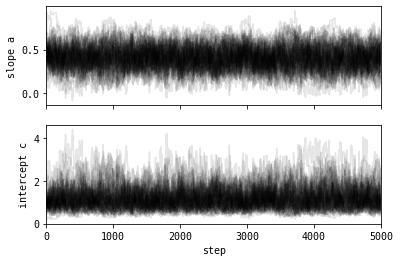

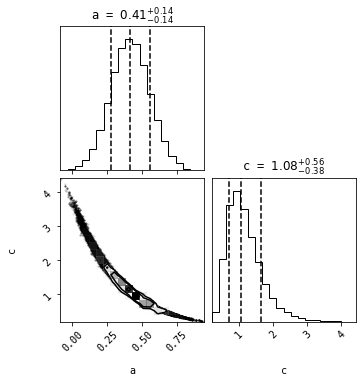

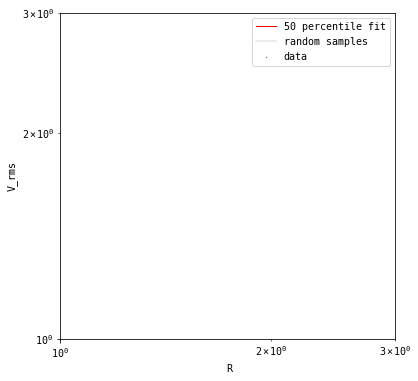

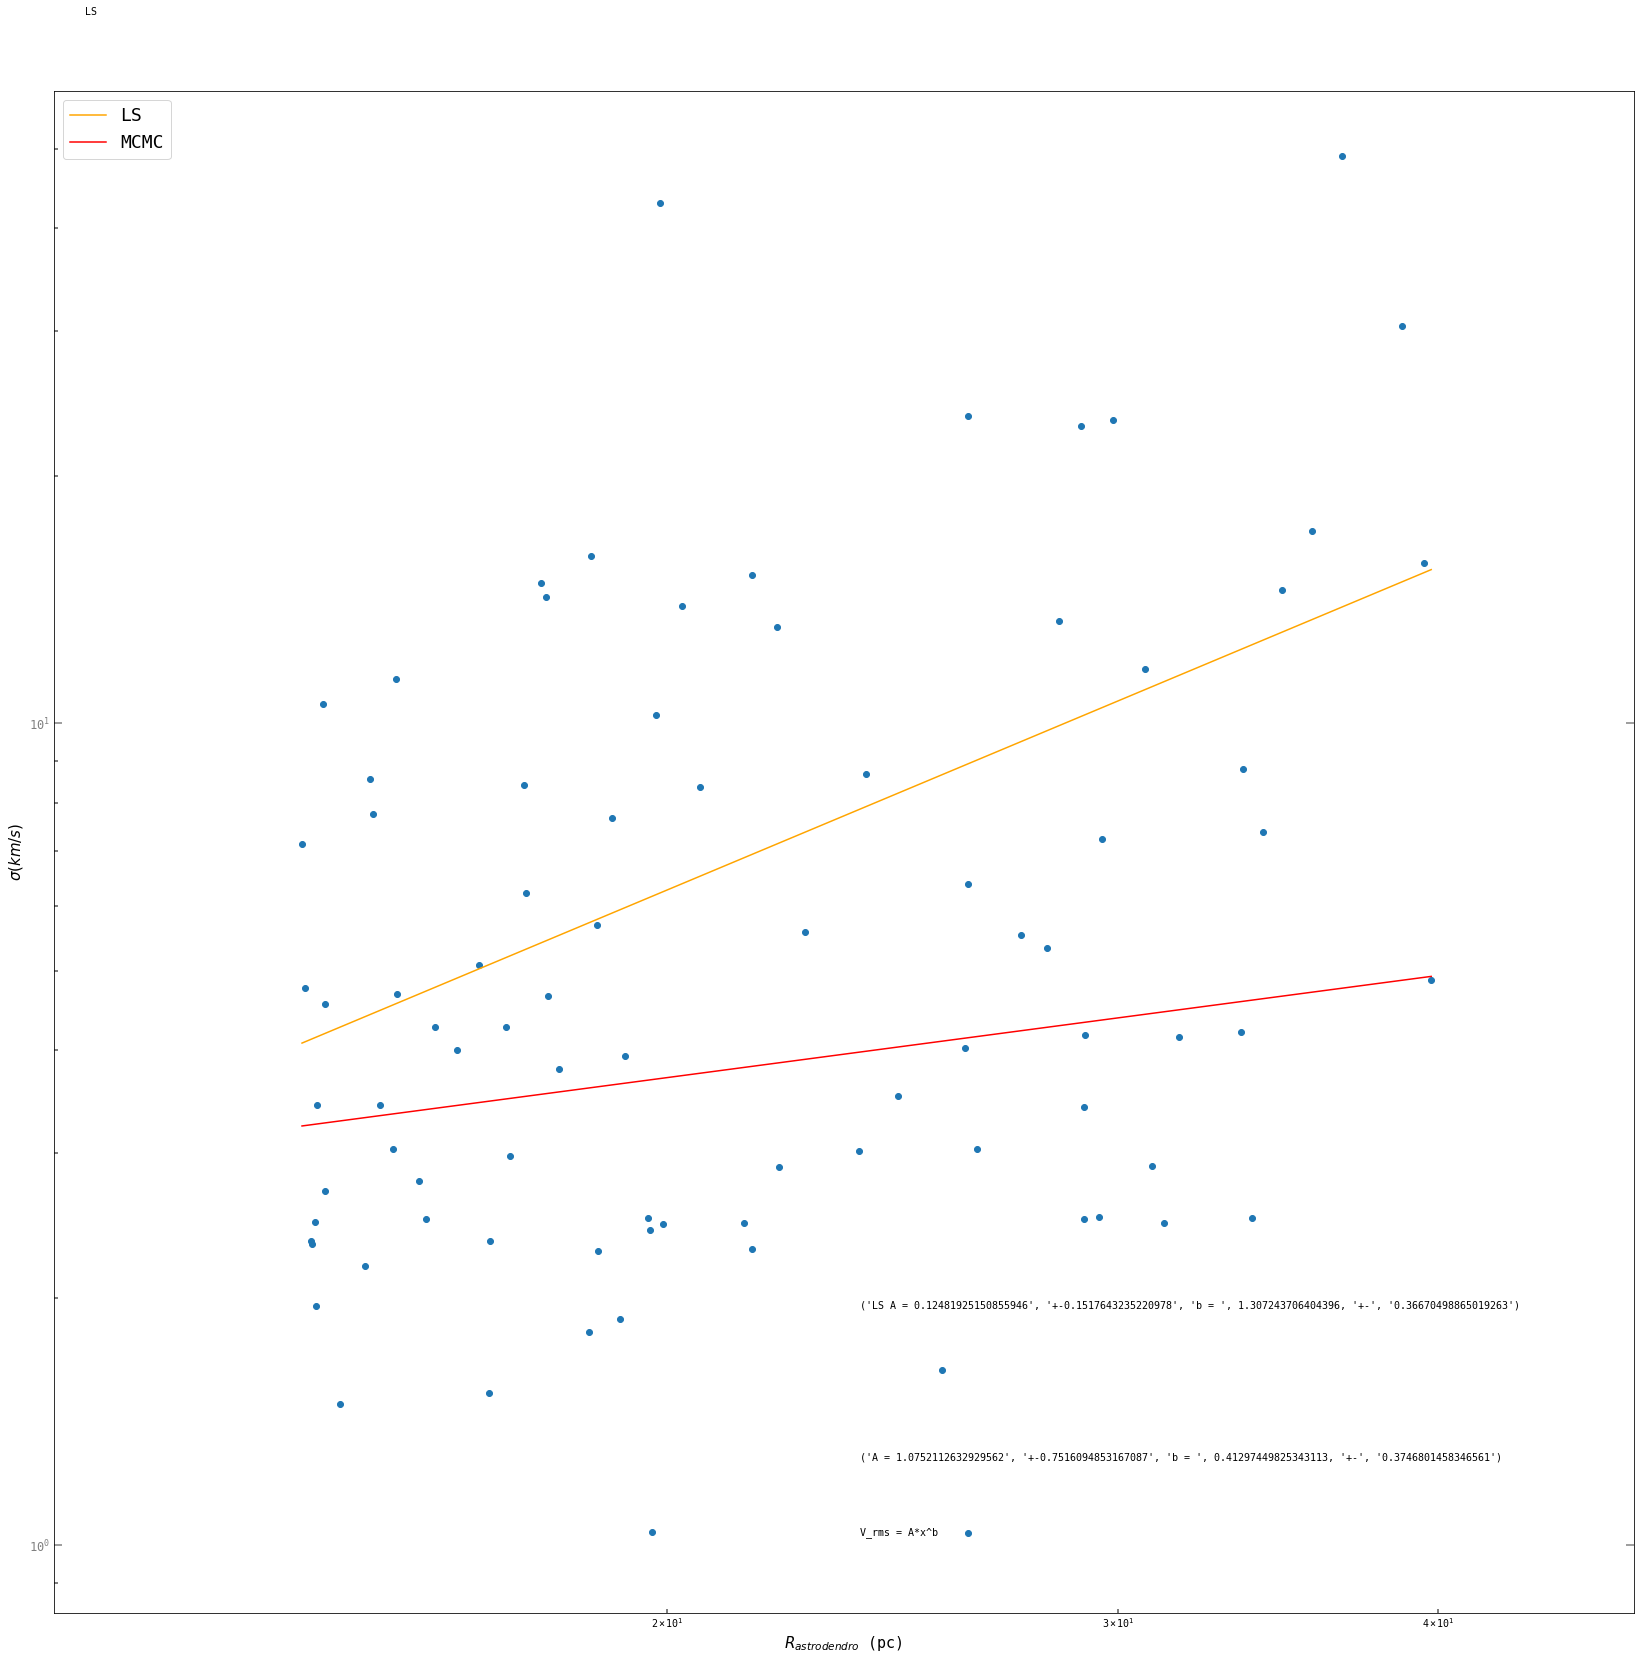

In [7]:
'''#check an individual line

r=5
print(np.shape(Results_CMZ[r]),File_Descriptors_cmz[r])
try:
    Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_CMZ[r]
    #Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_NGC[r]
except:
    Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_CMZ[r]
    #Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_NGC[r]
    r_err=copy.deepcopy(Size)
    print("No r_errors found")

Size_Leaves, Size_Branches, Size_All = strip_units(Size[0]), strip_units(Size[1]), (np.concatenate((strip_units(Size[0]), strip_units(Size[1]))))
###########################################################################
RMS_Velocity_Leaves, RMS_Velocity_Branches, RMS_Velocity_All = strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]), (np.concatenate((strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]))))
###########################################################################
V_rms_err_Leaves, V_rms_err_Branches, V_rms_err_All = strip_units(V_rms_err[0]), strip_units(V_rms_err[1]), (np.concatenate((strip_units(V_rms_err[0]), strip_units(V_rms_err[1]))))
###########################################################################
r_err_Leaves, r_err_Branches, r_err_All = strip_units(r_err[0]), strip_units(r_err[1]), (np.concatenate((strip_units(r_err[0]), strip_units(r_err[1]))))

for k in range(len(Size_All)):
    if Size_All[k]<14:
    
        Size_All[k]=np.nan
        pass
    if Size_All[k]>40:
        Size_All[k]=np.nan
        pass
    
    #print(Size_All[k])
_,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
_,r_err_All = crossmatch(Size_All,r_err_All)
Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)

for i in range(len(r_err_All)):
    r_err_All[i] = .1
    #V_rms_err_All[i]=1
    
    pass
#V_rms_err_All=Size_All/3
fac=1
fac2=fac*1
print(V_rms_err_All*fac2,r_err_All*fac)


"""

A = 1
b = 1
num_points = 10000

# Generate x values (log-uniformly spaced to better cover range)
x = np.sort(np.random.uniform(1.5, 10, num_points))  # avoid zero
# Generate corresponding y values following power law with some noise
y_true = A * x**b
noise = np.random.normal(0, 1 * y_true)  # 10% noise
y = y_true + noise

print(min(y),"AAA")
Size_All= x
r_err_All = np.full(np.shape(y),1)#x/1
RMS_Velocity_All = y 
V_rms_err_All = np.full(np.shape(y),1)#y/1
"""
#Define the form of the function for the curve_fit
def func(R,a,b):
    return a*R**(b)

popt_All, pcov_All = curve_fit(func,  Size_All,RMS_Velocity_All)

print("Least squrare fit on the data directly:" ,popt_All, np.sqrt(pcov_All))


make_MCMC_fit(M_1=(Size_All),M_2=(RMS_Velocity_All),M_1_err=(r_err_All*fac),M_2_err=(V_rms_err_All*fac2),nsteps=50000, nwalkers=500,input_="linear",temp=.1)


'''

# 4a. Size-Linewidth Plots Comparison

In [28]:
#Verify units/check values cmz/ngc
for i in range(len(File_Descriptors_cmz)):
    try:
        Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_CMZ[i]
    except:
        Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_CMZ[i]
    Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_CMZ[i][0]
    Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_CMZ[i][1],Fit_Results_CMZ[i][2]
    print("Size in", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit,   ". ",File_Descriptors_cmz[i],np.shape(Results_CMZ[i]),'with',len(Results_CMZ[i][0][0]), "leaves and",len(Results_CMZ[i][0][1]) ,'branches')




Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_H13CN_J1_0_Low_Delta_ (9, 2) with 127 leaves and 37 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_HCN_J1-0_Low_Delta_ (9, 2) with 228 leaves and 67 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_H13COp_J1_0_Low_Delta_ (9, 2) with 69 leaves and 33 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_3mm_HCO+_J1-0_Low_Delta_ (9, 2) with 92 leaves and 43 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_CO_J3_2__Low_Delta_ (9, 2) with 3387 leaves and 1161 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_CO_J1_0_Low_Delta_ (9, 2) with 220 leaves and 73 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K

# All structures; leaves; branches:


['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_'] ['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_0_', 'cmz_3mm_HCO+_J1-0_', 'cmz_CO_J3_2__', 'cmz_CO_J1_0_', 'cmz_SiO_J2_1_', 'NOT AVAILABLE', 'cmz_HCN_J4_3_', 'NOT AVAILABLE']
input data is of type linear fitting to powerlaw...
2.3772124338612706 8.45691374515261 2.5160789514512194 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.8874816566147588 3.271022606582852
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.8874816566147588, 0.007369966687821513] [3.271022606582852, 0.24906469789879387] 0.8961982088489748 2.611387634829116
[[0.84826049 2.76963564]
 [0.8415449  2.80639565]
 [0.83252011 2.8359419 ]
 ...
 [0.97153347 2.42144185]
 [0.98283863 2.48982

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13CN_J1_0_
    least sq  max like      MCMC
a   0.887482  0.896198  0.892169
a-  0.007370            0.058067
a+  0.007370            0.058604
c   3.271023  2.611388  2.621690
c-  0.249065            0.232602
c+  0.249065            0.218169



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8874816566147588 0.08584851010833859 14404.701503725306 90.90988102698284 1866.4768451090747
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8921688489511692 0.24097019246047904 3264.8186381535984 41.547321923257485 418.49494075753057
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_H13CN_J1_0_ Compare to NGC_253_H13CN_J1-0_ Size-Linewidth  MCMC_err

CMZ fit params and covariance error: a =  2.621690212115735  +-  0.23260188796062575 , b =  0.8921688489511692  +-  0.058066633654440314

Structures plotted:  58

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powe

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J1-0_
    least sq  max like      MCMC
a   0.537768  0.561600  0.546199
a-  0.005946            0.146148
a+  0.005946            0.125849
c   7.647833  6.996226  7.093927
c-  1.464595            1.664987
c+  1.464595            1.669904



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5377681346945181 0.0771076056088097 153320880.57766956 22738.880193640685 44446049.970623374
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5461988084311042 0.38229279492911716 43664252.63861035 835.961728627219 12414442.539969724
NGC253 fit params and covariance error: a =  7.093927222702453  +-  1.664986723035618 , b =  0.5461988084311042  +-  0.14614778105471604

Structures plotted:  7



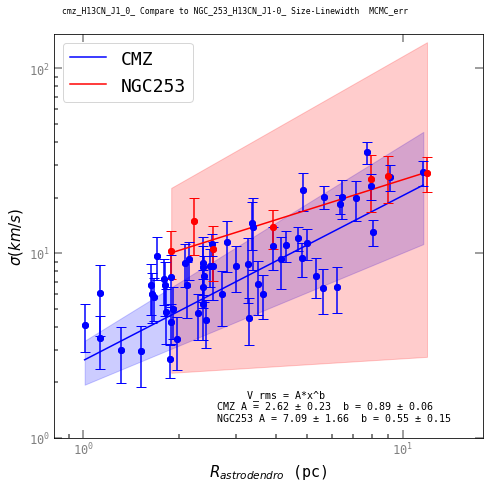

input data is of type linear fitting to powerlaw...
2.533431136416782 7.973970314200333 2.2458997491321253 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.7188743571009533 3.41779506999403
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.7188743571009533, 0.0035693083157959595] [3.41779506999403, 0.11669499560409984] 0.5743108415354873 2.5413297921369065
[[0.53259394 2.75806359]
 [0.57383661 2.5709673 ]
 [0.57793715 2.54347566]
 ...
 [0.63631721 2.3998593 ]
 [0.64758422 2.41673824]
 [0.61167845 2.44264551]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J1-0_
    least sq  max like      MCMC
a   0.718874  0.574311  0.571011
a-  0.003569            0.049106
a+  0.003569            0.050124
c   3.417795  2.541330  2.547047
c-  0.116695            0.147069
c+  0.116695            0.140820



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7188743571009533 0.059743688501765264 13698.386860478644 60.683441360833406 2616.947860841977
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.571011344965822 0.22159761430429145 1312.3753850047872 29.0774916150714 352.40878906750606
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_HCN_J1-0_ Compare to NGC_253_HCN_J1-0_ Size-Linewidth  MCMC_err

CMZ fit params and covariance error: a =  2.5470467311699765  +-  0.14706927773151168 , b =  0.571011344965822  +-  0.04910550266535352

Structures plotted:  135

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J1-0_
    least sq  max like      MCMC
a   0.713517  0.836575  0.830767
a-  0.002476            0.055310
a+  0.002476            0.055398
c   5.054269  3.601955  3.630871
c-  0.265746            0.298481
c+  0.265746            0.288397



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7135172291852816 0.049760540621720264 585849.8432903154 598.7477634330403 113310.2216021777
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8307666826824556 0.23518138355869006 28949.256841927716 114.53053078972756 4274.356454034992
NGC253 fit params and covariance error: a =  3.630870736724951  +-  0.29848143303274544 , b =  0.8307666826824556  +-  0.05531028317257969

Structures plotted:  49



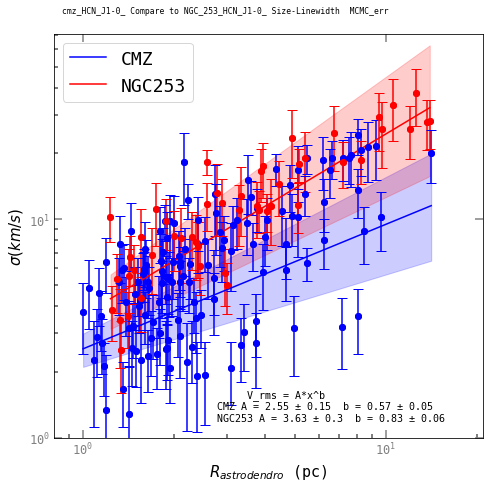

input data is of type linear fitting to powerlaw...
6.2773702492551795 13.270287028973787 2.0382323662032324 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.0162974619106726 2.2353225615048604
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.0162974619106726, 0.02142511988157619] [2.2353225615048604, 0.4723324087399708] 0.8078393824644646 2.458344650705005
[[0.76342965 2.54436231]
 [0.74748721 2.62621323]
 [0.75079284 2.69458331]
 ...
 [0.92264266 2.14394304]
 [0.87877693 2.31806484]
 [0.8861347  2.29982031]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13COp_J1_0_
    least sq  max like      MCMC
a   1.016297  0.807839  0.798820
a-  0.021425            0.087392
a+  0.021425            0.085869
c   2.235323  2.458345  2.488438
c-  0.472332            0.369377
c+  0.472332            0.339838



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.0162974619106726 0.14637322119013502 1784.925209680989 44.08236591776531 171.91847951531574
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7988203248425974 0.2956213613099249 1937.5720310305437 26.96345838371652 307.91974039393176
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_H13COp_J1_0_ Compare to NGC_253_H13CO+_J1-0_ Size-Linewidth  MCMC_err

CMZ fit params and covariance error: a =  2.488437531934513  +-  0.36937696470612513 , b =  0.7988203248425974  +-  0.08739198926273317

Structures plotted:  28

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to power

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CO+_J1-0_
    least sq  max like      MCMC
a   0.717779  0.748454  0.738029
a-  0.004397            0.085711
a+  0.004397            0.084970
c   4.491815  3.997517  4.045350
c-  0.313042            0.530352
c+  0.313042            0.507822



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7177792974214686 0.06631026539835103 162029.46825480787 341.76491350710086 31032.353178984602
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7380290615297969 0.2927642433163005 60726.631307694544 124.53563914122212 11100.693935869022
NGC253 fit params and covariance error: a =  4.045350128615368  +-  0.5303520011143741 , b =  0.7380290615297969  +-  0.085710902164566

Structures plotted:  20



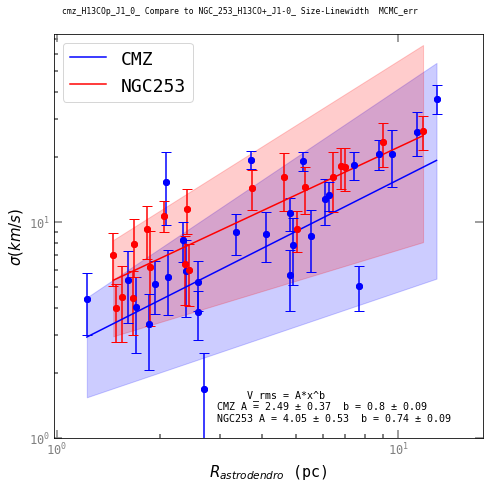

input data is of type linear fitting to powerlaw...
6.044004254266891 3.1402972749917373 1.0126452542938074 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.7306012552816871 3.07196223613296
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.7306012552816871, 0.010678626401749087] [3.07196223613296, 0.42200600645738456] 0.546257207818627 2.3715976539960058
[[0.57201635 2.35051445]
 [0.5919657  2.20041283]
 [0.68064537 1.94342549]
 ...
 [0.42832828 2.81394853]
 [0.39758331 2.94907613]
 [0.29947638 3.36985877]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_3mm_HCO+_J1-0_
    least sq  max like      MCMC
a   0.730601  0.546257  0.525896
a-  0.010679            0.118907
a+  0.010679            0.114936
c   3.071962  2.371598  2.440645
c-  0.422006            0.445251
c+  0.422006            0.405831



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7306012552816871 0.10333743949677235 6346.926827053863 78.54497490611523 1180.2180059027219
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5258964509802988 0.3448283963288332 925.8515883034146 16.70656401302093 275.8321756417188
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_3mm_HCO+_J1-0_ Compare to NGC_253_HCO+_J1-0_ Size-Linewidth  MCMC_err

CMZ fit params and covariance error: a =  2.4406449249602327  +-  0.4452514263770846 , b =  0.5258964509802988  +-  0.11890662291471488

Structures plotted:  44

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to power

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J1-0_
    least sq  max like      MCMC
a   0.675154  0.869990  0.868056
a-  0.002330            0.046423
a+  0.002330            0.046920
c   4.860174  3.039100  3.043134
c-  0.221641            0.225842
c+  0.221641            0.217338



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6751541489483301 0.04827487583454396 343026.5750102163 418.4168857364924 72472.56261102113
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8680560509504646 0.21546043626239345 8150.614237133623 66.59876192001485 1104.4200638796024
NGC253 fit params and covariance error: a =  3.0431342878196763  +-  0.2258424036583211 , b =  0.8680560509504646  +-  0.046423199594380904

Structures plotted:  55



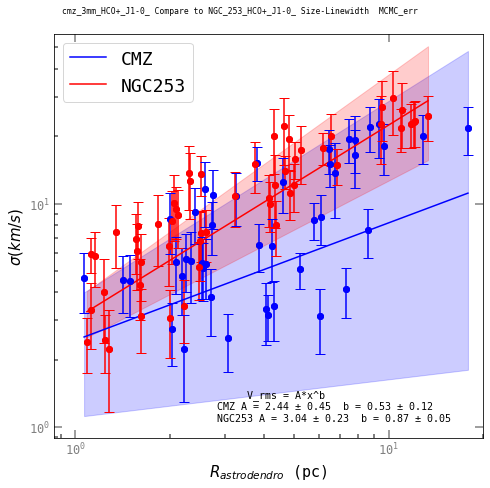

input data is of type linear fitting to powerlaw...
2.9330338868678623 3.902884571316188 0.945502247687858 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.6631583111573149 2.901142286686465
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.6631583111573149, 0.00035530738567486126] [2.901142286686465, 0.010658144047167948] 0.439274145218198 2.115460966817239
[[0.5346162  1.86671603]
 [0.5346162  1.86671603]
 [0.5346162  1.86671603]
 ...
 [0.42633107 2.12555936]
 [0.42601679 2.12566469]
 [0.42749264 2.12615865]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J3_2__
    least sq  max like      MCMC
a   0.663158  0.439274  0.439106
a-  0.000355            0.014059
a+  0.000355            0.014274
c   2.901142  2.115461  2.115322
c-  0.010658            0.035234
c+  0.010658            0.034761



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6631583111573149 0.0188495990852554 3666.9129298551447 9.488979989469328 796.4202366129597
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.4391056777928626 0.11856902382272358 358.44960821644884 17.893550507231314 130.4134644790847
Using MCMC fit with assumed errors, r_err =  0.1 min r = 0.8

cmz_CO_J3_2__ Compare to NGC_253_CO_J3-2_ Size-Linewidth  MCMC_err

CMZ fit params and covariance error: a =  2.1153224322478494  +-  0.0352339625391096 , b =  0.4391056777928626  +-  0.01405861341027359

Structures plotted:  1206

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J3-2_
    least sq  max like      MCMC
a   0.724949  0.580556  0.579742
a-  0.000497            0.018652
a+  0.000497            0.018634
c   3.817561  3.258846  3.260300
c-  0.023758            0.065102
c+  0.023758            0.065335



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7249486556417017 0.02228254425032742 34874.59930089988 43.68342421201051 6569.927404085059
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5797422772596177 0.13657134669369672 6918.985389373745 75.51560806512829 1820.9588690007395
NGC253 fit params and covariance error: a =  3.260300136257439  +-  0.06510218284543567 , b =  0.5797422772596177  +-  0.01865173273772991

Structures plotted:  583



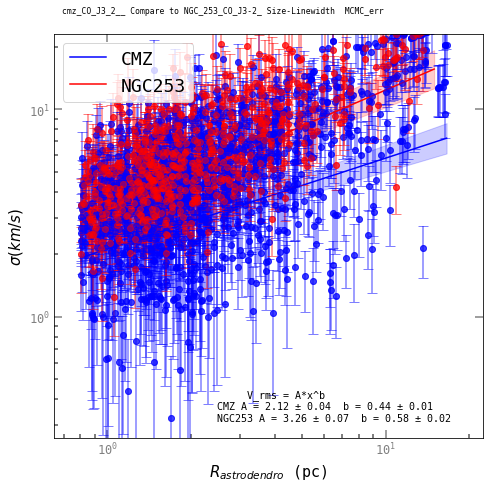

input data is of type linear fitting to powerlaw...
20.604951372863326 8.37030365935144 2.8660503902850616 1.0
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.4293933785174087 0.09026103151719234
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.4293933785174087, 0.014278580085241497] [0.09026103151719234, 0.0018543309537171193] 0.5789426619207046 0.7426047782359211
[[0.60166074 0.68168205]
 [0.59526082 0.6725627 ]
 [0.59526082 0.6725627 ]
 ...
 [0.54229815 0.86148854]
 [0.54229815 0.86148854]
 [0.49277717 0.98248551]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J1_0_
    least sq  max like      MCMC
a   1.429393  0.578943  0.567176
a-  0.014279            0.058028
a+  0.014279            0.060275
c   0.090261  0.742605  0.769945
c-  0.001854            0.159050
c+  0.001854            0.129985



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.4293933785174087 0.11949301270468285 33.0867728603846 1.0473539143364317 1.2310084427777463
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5671764112096072 0.24088964609939179 21.73308821191834 3.7448164221502833 5.8876913039766094
Using MCMC fit with assumed errors, r_err =  1 min r = 9.5

cmz_CO_J1_0_ Compare to NGC_253_CO_J1-0_ Size-Linewidth  MCMC_err

CMZ fit params and covariance error: a =  0.7699450315444483  +-  0.15904990691870202 , b =  0.5671764112096072  +-  0.05802782159789022

Structures plotted:  177

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
16

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J1-0_
    least sq  max like      MCMC
a   1.003433  1.335542  1.331975
a-  0.000931            0.029691
a+  0.000931            0.029917
c   0.664830  0.127764  0.129451
c-  0.008981            0.015856
c+  0.008981            0.014141



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.003432628381338 0.030507613370268156 46.5868126837754 0.9841498947855355 4.622004565045519
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.3319747747043482 0.1723112355102636 28.935166144390447 5.1130986643216865 1.3472593481776787
NGC253 fit params and covariance error: a =  0.12945120570127633  +-  0.015856314506844077 , b =  1.3319747747043482  +-  0.029691161883073525

Structures plotted:  180



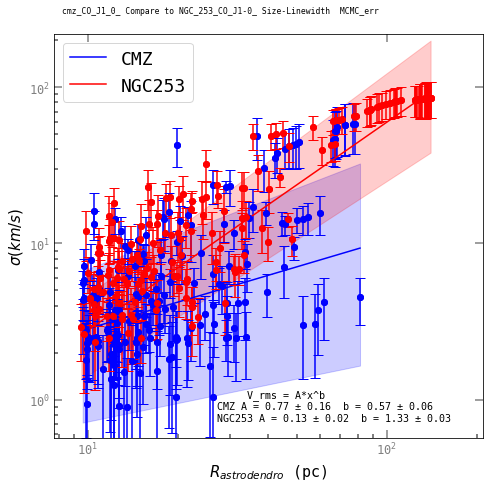

input data is of type linear fitting to powerlaw...
2.456587764360523 4.191847312770185 1.2577741157489633 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.6667353615512461 3.952412562719582
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.6667353615512461, 0.028356478117078716] [3.952412562719582, 1.0381166588315962] 0.8393040727382146 2.5282552301863945
[[0.85121053 2.09643265]
 [0.85099514 2.0913321 ]
 [0.85099514 2.0913321 ]
 ...
 [0.7755564  2.90916512]
 [0.7755564  2.90916512]
 [0.75247175 2.9801874 ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_SiO_J2_1_
    least sq  max like      MCMC
a   0.666735  0.839304  0.827307
a-  0.028356            0.098177
a+  0.028356            0.096911
c   3.952413  2.528255  2.562947
c-  1.038117            0.355078
c+  1.038117            0.329259



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6667353615512461 0.16839381852395507 41605.2297195574 315.41755871695193 8962.157310778852
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8273073040849404 0.313331836944539 2456.147697516303 30.341848957083382 365.55032549816747
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_SiO_J2_1_ Compare to NGC_253_SiO_J2-1_ Size-Linewidth  MCMC_err

CMZ fit params and covariance error: a =  2.5629471749508284  +-  0.35507755465243207 , b =  0.8273073040849404  +-  0.09817684004303917

Structures plotted:  28

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
5.2

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_SiO_J2-1_
    least sq  max like      MCMC
a   0.780537  0.788496  0.767515
a-  0.014938            0.134064
a+  0.014938            0.132448
c   3.942455  3.582587  3.663236
c-  0.693429            0.707687
c+  0.693429            0.645388



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7805368937966393 0.12222179907671608 52843.4945700969 290.50594816527007 8759.002216341067
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7675146198133125 0.3661475928220814 26961.914011209145 67.05911668059663 4605.068550820083
NGC253 fit params and covariance error: a =  3.6632360994669186  +-  0.7076874067613481 , b =  0.7675146198133125  +-  0.13406405972940472

Structures plotted:  13



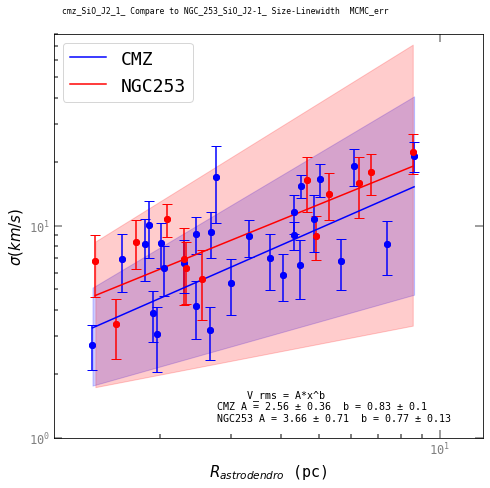

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_H13CN_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 8.45691374515261 2.5160789514512194 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.8874816566147588 3.271022606582852
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.8874816566147588, 0.007369966687821513] [3.271022606582852, 0.24906469789879387] 0.8961982088489748 2.611387634829116
[[0.98154032 2.21738568]
 [0.98154032 2.21738568]
 [0.98154032 2.21738568]
 ...
 [0.8210282  3.0082727 ]
 [0.82733674 2.98290964]
 [0.83165956 3.00238245]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   0.887482  0.896198  0.892254
a-  0.007370            0.058204
a+  0.007370            0.058376
c   3.271023  2.611388  2.620848
c-  0.249065            0.230428
c+  0.249065            0.217480



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8874816566147588 0.08584851010833859 14404.701503725306 90.90988102698284 1866.4768451090747
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8922537702358315 0.2412559107602491 3259.130971402049 41.554941590519974 417.68419604237306
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

NOT AVAILABLE Compare to NGC_253_H13CN_J4-3_ Size-Linewidth  MCMC_err

NGC_253_H13CN_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.7769403699430149 18.987060405036576 6.969209033683409 0.1
masking bad values ...
restricting fit to [None, None

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J4-3_
    least sq  max like      MCMC
a   0.914567  2.019023  1.854605
a-  0.121276            0.101526
a+  0.121276            0.156187
c   7.073055  1.915269  2.193322
c-  5.062937            0.332379
c+  5.062937            0.284374



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.9145667466207296 0.3482467873651423 97189939.11309646 33665.26442390413 11831901.987866392
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.8546054311672684 0.31863152284988466 11166.7706555938 63.633086334364734 156.07098290025945
NGC253 fit params and covariance error: a =  2.193322165472925  +-  0.3323785050266377 , b =  1.8546054311672684  +-  0.10152604735363657

Structures plotted:  11



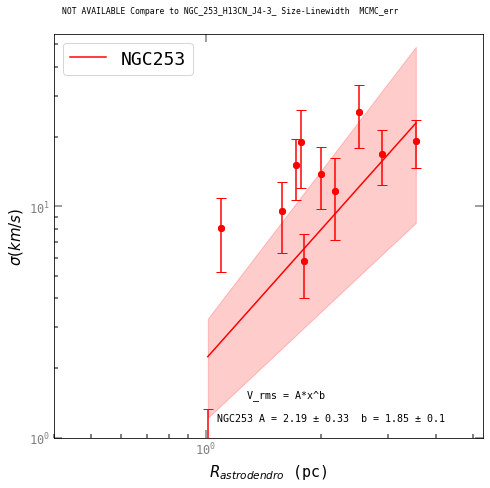

input data is of type linear fitting to powerlaw...
2.127798493004818 5.733256052622191 2.108629364314519 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.6964410077187836 5.026000449135785
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.6964410077187836, 0.0016650332583037298] [5.026000449135785, 0.12894756355157036] 0.848845804864502 3.38511492781786
[[1.158951   2.16197926]
 [0.99548264 2.73359324]
 [0.99548264 2.73359324]
 ...
 [0.87791008 3.37373082]
 [0.86300588 3.39494261]
 [0.90769304 3.2133395 ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J4_3_
    least sq  max like      MCMC
a   0.696441  0.848846  0.847497
a-  0.001665            0.034495
a+  0.001665            0.034517
c   5.026000  3.385115  3.387648
c-  0.128948            0.145562
c+  0.128948            0.143298



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6964410077187836 0.04080481905735804 527766.0588186424 395.8705954052457 106169.66551765581
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8474970602552638 0.18572918421952947 17184.82350907934 106.82303215132431 2441.4510200288723
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_HCN_J4_3_ Compare to NGC_253_HCN_J4-3_ Size-Linewidth  MCMC_err

CMZ fit params and covariance error: a =  3.3876480159662172  +-  0.14556191137205365 , b =  0.8474970602552638  +-  0.03449532987085191

Structures plotted:  145

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J4-3_
    least sq  max like      MCMC
a   0.754222  1.055106  1.049648
a-  0.006228            0.063139
a+  0.006228            0.061994
c   6.150922  3.058402  3.073260
c-  0.900131            0.304113
c+  0.900131            0.287789



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7542223570815688 0.07891671776371384 8037924.710422261 4081.670048103294 1415538.1446847774
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.0496483830471601 0.2512737885910739 13271.158799314771 77.01271782764856 1183.7512832624207
NGC253 fit params and covariance error: a =  3.073260462814697  +-  0.30411340693608535 , b =  1.0496483830471601  +-  0.06313851683291172

Structures plotted:  42



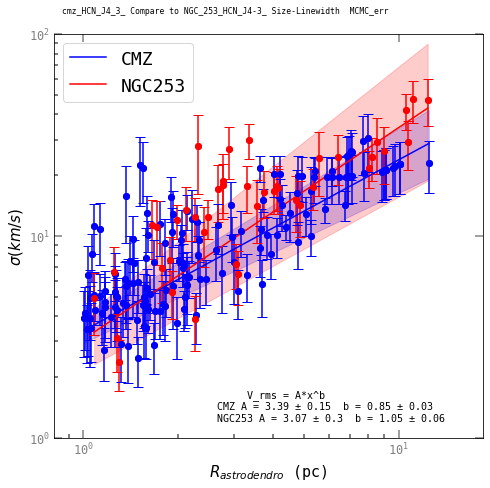

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_HCO+_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 8.45691374515261 2.5160789514512194 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.8874816566147588 3.271022606582852
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.8874816566147588, 0.007369966687821513] [3.271022606582852, 0.24906469789879387] 0.8961982088489748 2.611387634829116
[[0.90408702 2.53036288]
 [0.92194806 2.47157118]
 [0.91800722 2.48845897]
 ...
 [0.90561282 2.44447295]
 [0.92075125 2.4096311 ]
 [0.88930463 2.52612296]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   0.887482  0.896198  0.891362
a-  0.007370            0.058742
a+  0.007370            0.058214
c   3.271023  2.611388  2.627027
c-  0.249065            0.227580
c+  0.249065            0.221138



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8874816566147588 0.08584851010833859 14404.701503725306 90.90988102698284 1866.4768451090747
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8913618826690368 0.242367751401409 3299.0499986188956 41.64072627382531 423.6693191608084
Using MCMC fit with assumed errors, r_err =  0.1 min r = 0.9

NOT AVAILABLE Compare to NGC_253_HCO+_J4-3_ Size-Linewidth  MCMC_err

NGC_253_HCO+_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.0967037285160233 8.473945487329514 3.579715938591389 0.1
masking bad values ...
restricting fit to [None, None] .

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J4-3_
    least sq  max like      MCMC
a   0.797104  1.021511  1.018261
a-  0.004926            0.057473
a+  0.004926            0.057362
c   5.421027  3.247973  3.257287
c-  0.546241            0.290750
c+  0.546241            0.283580



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.797104387699934 0.07018510560121437 1652459.8745647157 1441.698074557325 263649.2467850077
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.018260986896956 0.2397354842075546 18860.25723231752 92.74766954156675 1808.3672149254423
NGC253 fit params and covariance error: a =  3.257286624824302  +-  0.29075006410622484 , b =  1.018260986896956  +-  0.05747310238823067

Structures plotted:  43



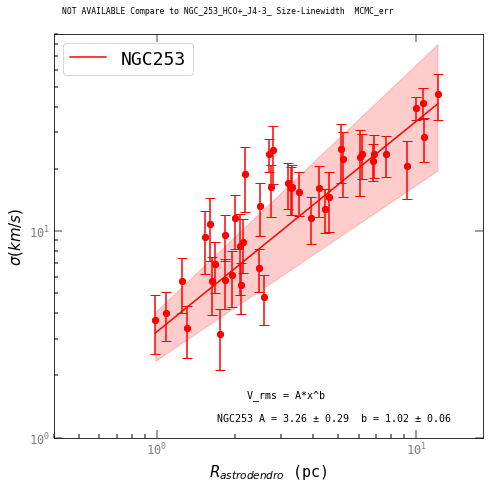

In [10]:
#ALL STRCUTRES (and the min r values)
# Make plots:

CMZ_names = File_Descriptors_cmz#[5]
NGC_names = File_Descriptors_NGC#[5]
MCMC=True
ls=False
use_manual_error_v=False
use_manual_error_r=True
plot_errors=True
save_name="MCMC_err"
fit_results_cmz = [[],[]]
fit_results_ngc = [[],[]]
'''
    "NGC_253_H13CN_J1-0_",
    "NGC_253_HCN_J1-0_",
    "NGC_253_H13CO+_J1-0_",
    "NGC_253_HCO+_J1-0_",
    "NGC_253_CO_J3-2_",
    "NGC_253_CO_J1-0_",
    "NGC_253_SiO_J2-1_",
    "NGC_253_H13CN_J4-3_",
    "NGC_253_HCN_J4-3_",
    "NGC_253_HCO+_J4-3_"
'''
min_rs = [1,1,1,1,.8,9.5,1,1,1,.9] #pc CO 10 should be 32? CO 32 should be .8 or 1?
max_rs = [9999,9999,9999,9999,9999,9999,99999,9999,9999,99999]
#manual errors:
#r_errs=[.86,.86,.86,.86,.6,14.6,.96,.6,.6,.6] #pc 1/5 of the beam
#r_errs=[.86,.86,.86,.86,.6,1,.96,.6,.6,.6] #pc 1/5 of the beam
r_errs=[.1,.1,.1,.1,.1,1,.1,.1,.1,.1] # arbitrary
v_errs=[.5,.5,.5,.5,.5,1,.5,.5,.5,.5,] #km/s unuesd
############################################################


#meta function for doing the plots of leaves and branches and stuff
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="All",save_name=save_name,fs=8,plot_errors=plot_errors,ls=14,figsize=(8,8))

['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_'] ['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_0_', 'cmz_3mm_HCO+_J1-0_', 'cmz_CO_J3_2__', 'cmz_CO_J1_0_', 'cmz_SiO_J2_1_', 'NOT AVAILABLE', 'cmz_HCN_J4_3_', 'NOT AVAILABLE']
input data is of type linear fitting to powerlaw...
2.3772124338612706 8.45691374515261 2.5160789514512194 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.4562308058912816 4.717738400901779
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.4562308058912816, 0.015426420977709097] [4.717738400901779, 0.3955833024432243] 0.6439093832599558 3.1807422635977347
[[0.92785292 2.35426914]
 [0.90864598 2.40291122]
 [0.89952354 2.4331766 ]
 ...
 [0.64514668 3.16003807]
 [0.61155579 3.29867

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13CN_J1_0_
    least sq  max like      MCMC
a   0.456231  0.643909  0.633151
a-  0.015426            0.098616
a+  0.015426            0.099464
c   4.717738  3.180742  3.209969
c-  0.395583            0.335784
c+  0.395583            0.316292



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.4562308058912816 0.12420314399285187 149268.85682674637 368.8726113778963 52208.16162206466
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.633150745047331 0.3140320860400186 6968.189174542691 51.722839425834266 1621.695036501237
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_H13CN_J1_0_ Compare to NGC_253_H13CN_J1-0_ Size-Linewidth  LeavesMCMC

CMZ fit params and covariance error: a =  3.2099691874724794  +-  0.33578360711810173 , b =  0.633150745047331  +-  0.09861615106264565

Structures plotted:  42

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J1-0_
    least sq  max like      MCMC
a   0.607235  0.560660  0.535399
a-  0.017350            0.264717
a+  0.017350            0.217943
c   6.987375  6.977432  7.038901
c-  2.269549            1.888119
c+  2.269549            2.065064



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.60723539367079 0.13171882310534686 39319673.75639892 14334.71134811119 9713472.435085157
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5353990299778199 0.51450607853244 37523213.20937264 442.22817406795514 10937069.983859038
NGC253 fit params and covariance error: a =  7.038900991076456  +-  1.8881189879531401 , b =  0.5353990299778199  +-  0.2647165048468293

Structures plotted:  5



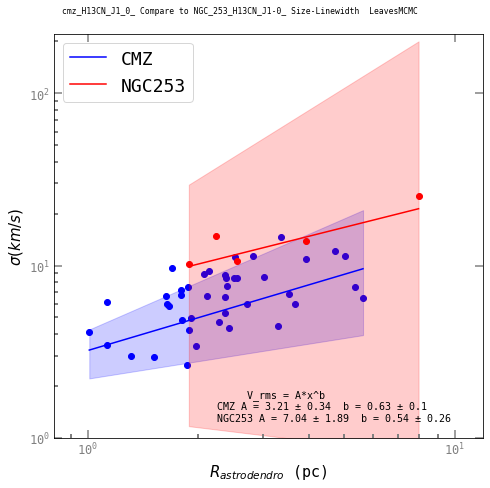

input data is of type linear fitting to powerlaw...
2.533431136416782 7.973970314200333 2.2458997491321253 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.5253906106361357 3.8355032042962955
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.5253906106361357, 0.013855943985586625] [3.8355032042962955, 0.1954371550346309] 0.3753863263685209 2.847301358797322
[[0.49461074 2.66501012]
 [0.46118503 2.72655376]
 [0.46978374 2.66719911]
 ...
 [0.46646853 2.72870066]
 [0.37995403 2.85596654]
 [0.37995403 2.85596654]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J1-0_
    least sq  max like      MCMC
a   0.525391  0.375386  0.369776
a-  0.013856            0.085610
a+  0.013856            0.088060
c   3.835503  2.847301  2.857306
c-  0.195437            0.202428
c+  0.195437            0.194547



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5253906106361357 0.11771127382535042 22955.873080416837 101.76599576640368 6847.04534935452
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.36977581247615693 0.2925917475288082 1686.8712057362568 29.664536496689085 719.9562605485897
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_HCN_J1-0_ Compare to NGC_253_HCN_J1-0_ Size-Linewidth  LeavesMCMC

CMZ fit params and covariance error: a =  2.857306112570987  +-  0.2024275134913216 , b =  0.36977581247615693  +-  0.08560993072196182

Structures plotted:  104

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw..

mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J1-0_
    least sq  max like      MCMC
a   0.886493  1.001198  0.979743
a-  0.011818            0.145641
a+  0.011818            0.148410
c   4.224430  3.245403  3.288151
c-  0.273579            0.420679
c+  0.273579            0.393134



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8864927625410202 0.10871093775603248 129099.10087792312 285.3073642453752 16766.03834386745
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.9797432098727146 0.38162980803006724 18530.809049098178 72.97519894091562 1941.5615867558595
NGC253 fit params and covariance error: a =  3.288151171015992  +-  0.42067867405758985 , b =  0.9797432098727146  +-  0.14564131037706596

Structures plotted:  29



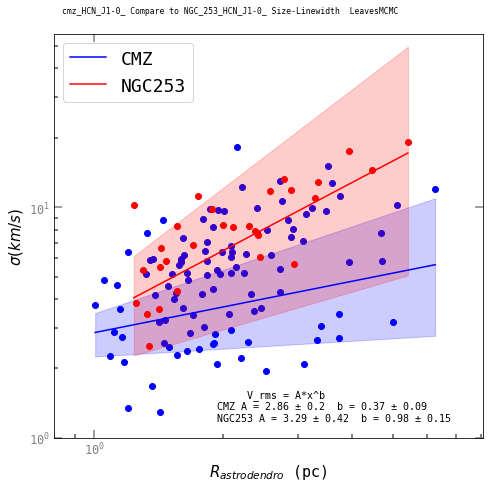

input data is of type linear fitting to powerlaw...
6.2773702492551795 13.270287028973787 2.0382323662032324 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.30700735214462505 4.754870199737155
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.30700735214462505, 0.047175017111452056] [4.754870199737155, 1.8402519952199696] 0.3730327598522616 3.2901729455744952
[[0.53295606 2.63168145]
 [0.54508483 2.59140819]
 [0.54508483 2.59140819]
 ...
 [0.3014561  3.36640674]
 [0.30914625 3.34223663]
 [0.29926265 3.36161546]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13COp_J1_0_
    least sq  max like      MCMC
a   0.307007  0.373033  0.347673
a-  0.047175            0.135446
a+  0.047175            0.139846
c   4.754870  3.290173  3.379821
c-  1.840252            0.630442
c+  1.840252            0.557930



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.30700735214462505 0.21719810568108566 115312.80907333796 699.1278382931121 56868.29396742064
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.34767274092073974 0.3680295035511907 5339.41325777091 32.7234248742129 2397.8432790917573
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_H13COp_J1_0_ Compare to NGC_253_H13CO+_J1-0_ Size-Linewidth  LeavesMCMC

CMZ fit params and covariance error: a =  3.3798207945885723  +-  0.6304418278943649 , b =  0.34767274092073974  +-  0.13544571548413586

Structures plotted:  19

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to pow

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CO+_J1-0_
    least sq  max like      MCMC
a   0.698090  0.819163  0.768031
a-  0.028279            0.198916
a+  0.028279            0.225888
c   4.531497  3.876740  4.019575
c-  0.654930            0.782961
c+  0.654930            0.658609



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6980904525895767 0.1681645313211509 169663.16449954 506.05902237117755 34001.42435451741
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7680312591200369 0.446000117155513 61320.635356963176 89.4447355891249 10461.052626478104
NGC253 fit params and covariance error: a =  4.019575386908903  +-  0.7829606038017145 , b =  0.7680312591200369  +-  0.19891610450273134

Structures plotted:  12



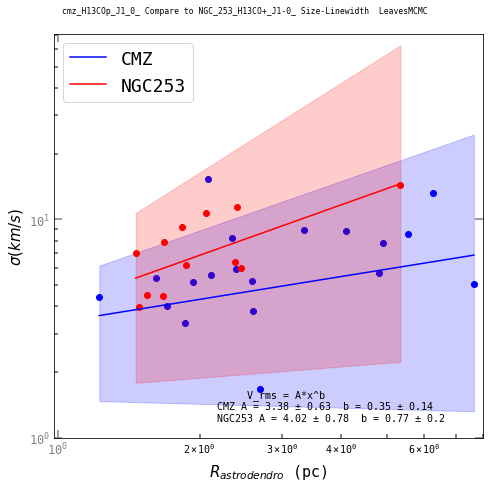

input data is of type linear fitting to powerlaw...
6.044004254266891 3.1402972749917373 1.0126452542938074 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.2919895449657596 4.651254840854287
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.2919895449657596, 0.036799750637540436] [4.651254840854287, 1.4111125737672463] 0.18143732167775944 3.5692014296003944
[[0.25732125 3.39890806]
 [0.22569561 3.52423793]
 [0.20695813 3.60451238]
 ...
 [0.30797345 2.99561606]
 [0.30770675 2.99689091]
 [0.30770675 2.99689091]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_3mm_HCO+_J1-0_
    least sq  max like      MCMC
a   0.291990  0.181437  0.162944
a-  0.036800            0.132071
a+  0.036800            0.130464
c   4.651255  3.569201  3.641692
c-  1.411113            0.632621
c+  1.411113            0.572654



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.2919895449657596 0.19183261098556845 87749.4465175355 534.0533981978098 44797.60961929872
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.1629439157716585 0.3634153610064055 6377.292805660222 35.54342636069639 4382.202494928922
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_3mm_HCO+_J1-0_ Compare to NGC_253_HCO+_J1-0_ Size-Linewidth  LeavesMCMC

CMZ fit params and covariance error: a =  3.6416924417774865  +-  0.6326213277860591 , b =  0.1629439157716585  +-  0.13207072461541602

Structures plotted:  31

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to power

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J1-0_
    least sq  max like      MCMC
a   0.877898  0.918199  0.904936
a-  0.018221            0.124461
a+  0.018221            0.127318
c   3.845507  2.827996  2.846743
c-  0.347524            0.308681
c+  0.347524            0.289866



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8778976695117707 0.1349837837517693 52893.7338837343 205.87333621571574 7006.5876036914015
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.9049363213424779 0.3527901784467006 5645.193530588867 46.47798726613282 702.6556032051782
NGC253 fit params and covariance error: a =  2.8467425138159586  +-  0.3086806683307226 , b =  0.9049363213424779  +-  0.12446091000845483

Structures plotted:  34



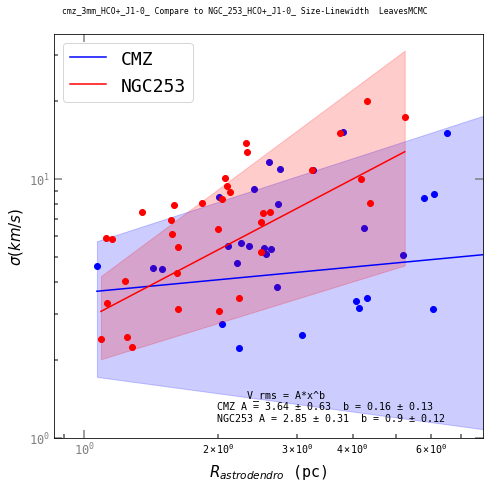

input data is of type linear fitting to powerlaw...
2.9330338868678623 3.902884571316188 0.945502247687858 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.25223676390477534 3.6278038883469144
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.25223676390477534, 0.001505392114829579] [3.6278038883469144, 0.013590719200072082] 0.2510022570276313 2.2698490714883413
[[0.27199555 2.2186938 ]
 [0.276318   2.20515318]
 [0.26956133 2.21448148]
 ...
 [0.25138153 2.2617116 ]
 [0.25138153 2.2617116 ]
 [0.24703992 2.27162135]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J3_2__
    least sq  max like      MCMC
a   0.252237  0.251002  0.250377
a-  0.001505            0.022196
a+  0.001505            0.022136
c   3.627804  2.269849  2.269714
c-  0.013591            0.040194
c+  0.013591            0.039776



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.25223676390477534 0.0387993829181545 7586.485852103643 15.45515590373763 4244.278644211818
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.25037657014684744 0.1489842786259238 331.1999094964285 16.94685645124763 186.08597371532022
Using MCMC fit with assumed errors, r_err =  0.1 min r = 0.8

cmz_CO_J3_2__ Compare to NGC_253_CO_J3-2_ Size-Linewidth  LeavesMCMC

CMZ fit params and covariance error: a =  2.269713639290853  +-  0.04019415104372959 , b =  0.25037657014684744  +-  0.022196315277686895

Structures plotted:  881

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw.

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J3-2_
    least sq  max like      MCMC
a   0.419175  0.412182  0.411664
a-  0.001749            0.025603
a+  0.001749            0.026114
c   4.656664  3.476475  3.477066
c-  0.029877            0.071811
c+  0.029877            0.071155



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.41917537943542743 0.0418269811656769 119080.28243402217 90.58791156401847 45359.104987435916
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.4116637851438523 0.1600105446309349 7739.796316921299 78.65563726470599 2999.6165883416847
NGC253 fit params and covariance error: a =  3.477065746650012  +-  0.07181090098483134 , b =  0.4116637851438523  +-  0.025603374393088407

Structures plotted:  464



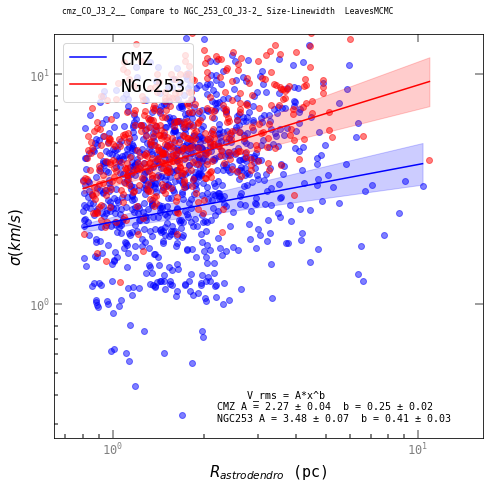

input data is of type linear fitting to powerlaw...
20.604951372863326 8.37030365935144 2.8660503902850616 1.0
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.0580489715694162 3.6371910475529394
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.0580489715694162, 0.05716047144996641] [3.6371910475529394, 5.508051980179818] 0.07374395147132586 2.6532263499674924
[[ 0.1994083   1.92112594]
 [ 0.16576669  2.15330607]
 [ 0.16576669  2.15330607]
 ...
 [-0.08464669  4.04884424]
 [-0.00920146  3.47423678]
 [-0.00920146  3.47423678]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J1_0_
    least sq  max like      MCMC
a   0.058049  0.073744  0.007277
a-  0.057160            0.151628
a+  0.057160            0.158514
c   3.637191  2.653226  3.167013
c-  5.508052            1.634734
c+  5.508052            1.065064



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.0580489715694162 0.2390825619947352 4957.240841921623 250.7486255512328 4337.016231822883
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.007276854129777105 0.38939495961216847 1493.7917198957111 9.448350685756985 1468.9709036730912
Using MCMC fit with assumed errors, r_err =  1 min r = 9.5

cmz_CO_J1_0_ Compare to NGC_253_CO_J1-0_ Size-Linewidth  LeavesMCMC

CMZ fit params and covariance error: a =  3.1670131936804093  +-  1.6347342779291765 , b =  0.007276854129777105  +-  0.1516284345713623

Structures plotted:  112

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J1-0_
    least sq  max like      MCMC
a   0.666352  0.579210  0.545290
a-  0.017008            0.103531
a+  0.017008            0.105302
c   1.287466  1.173956  1.290892
c-  0.247752            0.442689
c+  0.247752            0.329028



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6663518663869159 0.13041661862427162 89.91208302823416 7.170272485628696 19.38501729724763
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5452901577925754 0.3217621654219315 68.57752803551585 5.022568406553558 19.538520215717718
NGC253 fit params and covariance error: a =  1.2908916685698493  +-  0.4426889312422617 , b =  0.5452901577925754  +-  0.10353089109701041

Structures plotted:  101



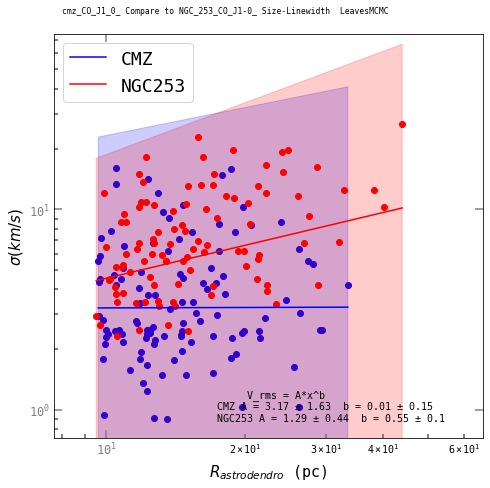

input data is of type linear fitting to powerlaw...
2.456587764360523 4.191847312770185 1.2577741157489633 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.6028334880332331 4.177255266743676
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.6028334880332331, 0.049169945074053395] [4.177255266743676, 1.4281251851605328] 0.7768181607586714 2.616529210076129
[[0.8660679  2.1624091 ]
 [0.90391413 2.17962419]
 [0.89190609 2.22277291]
 ...
 [0.69992601 2.88548357]
 [0.76252286 2.78973989]
 [0.76252286 2.78973989]]
plotting walkers ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_SiO_J2_1_
    least sq  max like      MCMC
a   0.602833  0.776818  0.763433
a-  0.049170            0.133763
a+  0.049170            0.135242
c   4.177255  2.616529  2.651644
c-  1.428125            0.439637
c+  1.428125            0.400236



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6028334880332331 0.2217429707432761 60268.274100487855 445.31157949785717 15040.25732653992
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7634326127361613 0.36573604806784143 2600.616255533531 27.529560691230795 448.3773440385604
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_SiO_J2_1_ Compare to NGC_253_SiO_J2-1_ Size-Linewidth  LeavesMCMC

CMZ fit params and covariance error: a =  2.651643660105771  +-  0.43963707383187556 , b =  0.7634326127361613  +-  0.13376285685628242

Structures plotted:  23

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_SiO_J2-1_
    least sq  max like      MCMC
a   0.796979  0.872520  0.814022
a-  0.038512            0.216102
a+  0.038512            0.231310
c   4.093083  3.506669  3.677473
c-  1.078792            0.869885
c+  1.078792            0.742227



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7969791872853339 0.19624600762517327 77635.79844016791 439.2846435721713 12390.328949056911
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8140223664914701 0.46486757132324036 31009.521041757092 57.40889541693423 4758.528687808989
NGC253 fit params and covariance error: a =  3.6774726918926364  +-  0.8698852822646579 , b =  0.8140223664914701  +-  0.21610185886796796

Structures plotted:  9



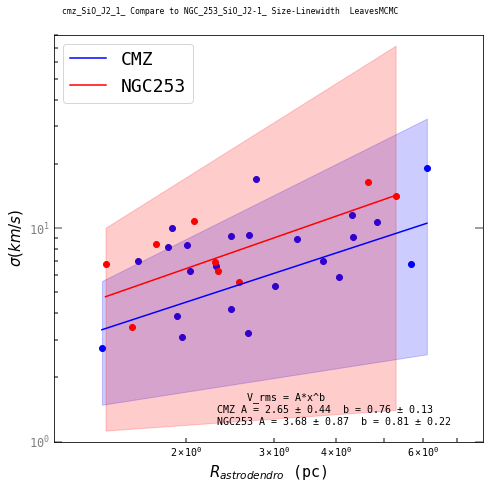

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_H13CN_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 8.45691374515261 2.5160789514512194 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.4562308058912816 4.717738400901779
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.4562308058912816, 0.015426420977709097] [4.717738400901779, 0.3955833024432243] 0.6439093832599558 3.1807422635977347
[[0.6522947  3.18099694]
 [0.68197565 3.0948889 ]
 [0.58466309 3.34958881]
 ...
 [0.63750231 3.1899987 ]
 [0.63869314 3.18647515]
 [0.6554137  3.21697688]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   0.456231  0.643909  0.633251
a-  0.015426            0.099173
a+  0.015426            0.099381
c   4.717738  3.180742  3.204511
c-  0.395583            0.332907
c+  0.395583            0.313312



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.4562308058912816 0.12420314399285187 149268.85682674637 368.8726113778963 52208.16162206466
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6332511597598403 0.31491679968708214 6882.756507921769 51.586326134967905 1601.4421168693436
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

NOT AVAILABLE Compare to NGC_253_H13CN_J4-3_ Size-Linewidth  LeavesMCMC

NGC_253_H13CN_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.7769403699430149 18.987060405036576 6.969209033683409 0.1
masking bad values ...
restricting fit to [None, No

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J4-3_
    least sq  max like      MCMC
a   0.987621  2.402245  1.881007
a-  0.227686            0.086549
a+  0.227686            0.161833
c   6.356896  1.645717  2.242025
c-  5.227396            0.319754
c+  5.227396            0.304542



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.9876214793513458 0.47716410943917614 22106372.18534599 16319.809435568082 2274552.671749721
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.8810067779667303 0.29419197204181036 13274.927493550866 67.34862926381996 174.59241799259982
NGC253 fit params and covariance error: a =  2.242025379716211  +-  0.31975350216085463 , b =  1.8810067779667303  +-  0.08654891641384932

Structures plotted:  9



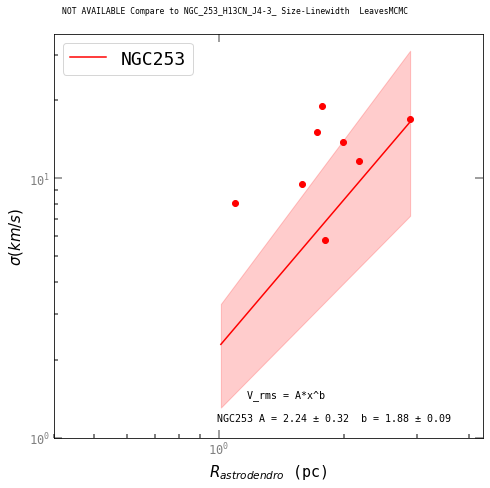

input data is of type linear fitting to powerlaw...
2.127798493004818 5.733256052622191 2.108629364314519 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.6378970762488202 4.730813503446537
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.6378970762488202, 0.04982032040548561] [4.730813503446537, 0.32390564172405634] 0.5403097319341059 3.8060968819727905
[[0.58254447 3.72253017]
 [0.58254447 3.72253017]
 [0.57861389 3.73047369]
 ...
 [0.4737008  3.72125404]
 [0.50155496 3.68685148]
 [0.56338112 3.43168862]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J4_3_
    least sq  max like      MCMC
a   0.637897  0.540310  0.531191
a-  0.049820            0.149877
a+  0.049820            0.151465
c   4.730814  3.806097  3.821408
c-  0.323906            0.270981
c+  0.323906            0.263847



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6378970762488202 0.22320466035790026 233727.91219575077 419.9630682366619 53803.868607696546
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5311914109816628 0.38713949031131745 22521.61065121994 93.03437127600401 6628.389722091444
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_HCN_J4_3_ Compare to NGC_253_HCN_J4-3_ Size-Linewidth  LeavesMCMC

CMZ fit params and covariance error: a =  3.8214080352297928  +-  0.27098129225526124 , b =  0.5311914109816628  +-  0.14987698495850665

Structures plotted:  75

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J4-3_
    least sq  max like      MCMC
a   0.652957  1.211458  1.192980
a-  0.053236            0.138943
a+  0.053236            0.137110
c   6.853957  2.692164  2.727702
c-  3.171888            0.390945
c+  3.171888            0.368124



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6529567475119986 0.2307283719049748 32130232.056091618 15319.842190392537 7144257.751227482
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.1929796312712766 0.37275100774156666 8330.71075156809 51.01805103526692 534.1982050655013
NGC253 fit params and covariance error: a =  2.727702424435152  +-  0.39094491988874136 , b =  1.1929796312712766  +-  0.13894331377235347

Structures plotted:  26



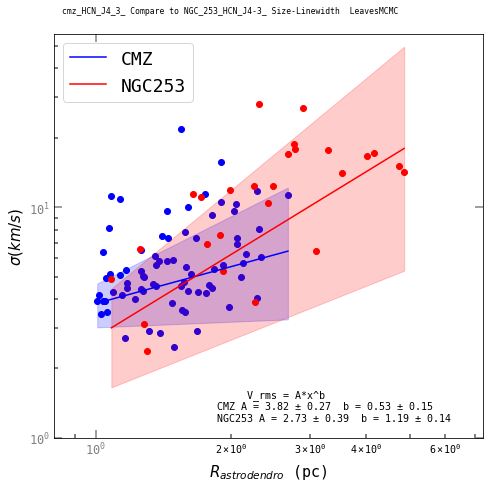

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_HCO+_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 8.45691374515261 2.5160789514512194 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.4562308058912816 4.717738400901779
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.4562308058912816, 0.015426420977709097] [4.717738400901779, 0.3955833024432243] 0.6439093832599558 3.1807422635977347
[[0.65706296 3.08425472]
 [0.61423054 3.25853847]
 [0.56942953 3.42445778]
 ...
 [0.66024399 3.42072353]
 [0.67434106 3.47034014]
 [0.65509455 3.50498277]]
plotting walkers ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   0.456231  0.643909  0.634124
a-  0.015426            0.096676
a+  0.015426            0.099867
c   4.717738  3.180742  3.204772
c-  0.395583            0.332197
c+  0.395583            0.312255



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.4562308058912816 0.12420314399285187 149268.85682674637 368.8726113778963 52208.16162206466
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6341243300759036 0.31092820461162196 6900.75254116791 51.68773477476618 1602.4043820675915
Using MCMC fit with assumed errors, r_err =  0.1 min r = 0.9

NOT AVAILABLE Compare to NGC_253_HCO+_J4-3_ Size-Linewidth  LeavesMCMC

NGC_253_HCO+_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.0967037285160233 8.473945487329514 3.579715938591389 0.1
masking bad values ...
restricting fit to [None, None]

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J4-3_
    least sq  max like      MCMC
a   0.594640  0.894944  0.879099
a-  0.015740            0.105849
a+  0.015740            0.110774
c   6.280596  3.576984  3.614220
c-  1.037697            0.394707
c+  1.037697            0.370653



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5946395678300643 0.1254573029668449 7503014.559801728 4234.343230992757 1908078.4270447171
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8790989919178288 0.32534366714120905 31139.99349030052 101.37839215635286 4113.576000398062
NGC253 fit params and covariance error: a =  3.6142195255266407  +-  0.39470651136073664 , b =  0.8790989919178288  +-  0.10584850174888982

Structures plotted:  27



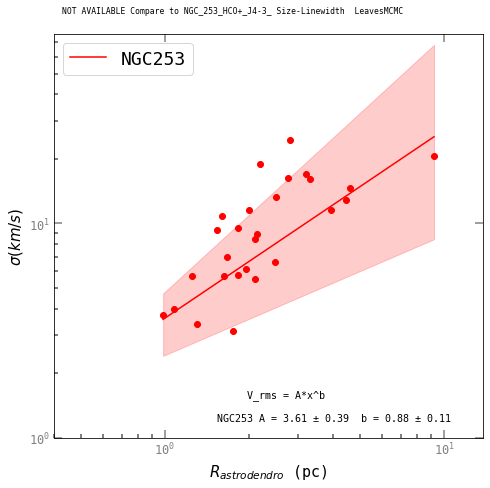

In [7]:
#LEAVES
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="Leaves",save_name=save_name,fs=8,plot_errors=plot_errors)

['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_'] ['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_0_', 'cmz_3mm_HCO+_J1-0_', 'cmz_CO_J3_2__', 'cmz_CO_J1_0_', 'cmz_SiO_J2_1_', 'NOT AVAILABLE', 'cmz_HCN_J4_3_', 'NOT AVAILABLE']
input data is of type linear fitting to powerlaw...
7.724598111313055 35.128116909280955 4.748336844220261 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.8221565990628561 3.92958637883303
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.8221565990628561, 0.06757023143997835] [3.92958637883303, 4.16762925333795] 0.9513023130596443 2.5567271807261887
[[0.96106687 2.56599217]
 [0.92022932 2.73270702]
 [0.90803265 2.72898346]
 ...
 [0.58009876 4.87180192]
 [0.62403023 4.7147842 ]


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13CN_J1_0_
    least sq  max like      MCMC
a   0.822157  0.951302  0.892022
a-  0.067570            0.176789
a+  0.067570            0.176128
c   3.929586  2.556727  2.860127
c-  4.167629            1.141142
c+  4.167629            0.832575



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8221565990628561 0.259942746465406 56460.27354003102 736.1264259921417 8503.278019888063
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8920221658473786 0.4204631771484197 5651.315440561091 23.535501406426572 724.6484760706884
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_H13CN_J1_0_ Compare to NGC_253_H13CN_J1-0_ Size-Linewidth  BranchesMCMC

CMZ fit params and covariance error: a =  2.8601273832257217  +-  1.1411415497247352 , b =  0.8920221658473786  +-  0.17678928333774335

Structures plotted:  16

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J1-0_
    least sq  max like      MCMC
a   0.137648  0.137648  0.654464
a-       inf            0.372157
a+       inf            0.196964
c  19.396974 19.396974  5.430367
c-       inf            3.102548
c+       inf            3.223764



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.1376479093619477 inf 3.4246970970353857e+19 inf 2.4944468589451088e+19
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6544642864545375 0.6100463801822221 1215714.0242077056 21.48085279854835 269381.1112887834
NGC253 fit params and covariance error: a =  5.430367140196741  +-  3.102547915311768 , b =  0.6544642864545375  +-  0.37215658597343226

Structures plotted:  2



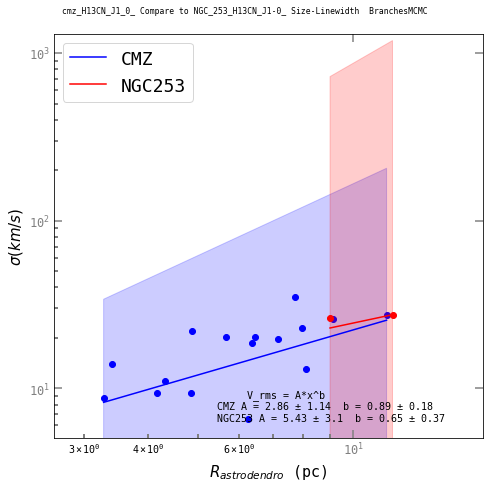

input data is of type linear fitting to powerlaw...
8.061749043027628 24.24495003494291 4.518215127402175 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.5709432000403658 4.793725871644766
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.5709432000403658, 0.03682395246249122] [4.793725871644766, 3.3130971012129424] 0.4944148411436447 3.2720069630659605
[[0.6584186  2.40787018]
 [0.64379587 2.50934472]
 [0.67228034 2.37283739]
 ...
 [0.44898246 3.74061161]
 [0.32948525 4.41147798]
 [0.33404697 4.3381183 ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J1-0_
    least sq  max like      MCMC
a   0.570943  0.494415  0.477457
a-  0.036824            0.112966
a+  0.036824            0.106306
c   4.793726  3.272007  3.360013
c-  3.313097            0.693776
c+  3.313097            0.616003



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5709432000403658 0.19189568119812186 231562.9489621112 1329.1465683421638 62190.7610766226
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.47745674073749267 0.3361034069603547 6878.112093828419 36.10608774375659 2290.9336354553357
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_HCN_J1-0_ Compare to NGC_253_HCN_J1-0_ Size-Linewidth  BranchesMCMC

CMZ fit params and covariance error: a =  3.3600125085813675  +-  0.6937764243732172 , b =  0.47745674073749267  +-  0.11296550017035778

Structures plotted:  31

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw..

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J1-0_
    least sq  max like      MCMC
a   0.663098  0.799007  0.775845
a-  0.012672            0.106260
a+  0.012672            0.105167
c   5.653046  3.805495  3.953632
c-  2.003198            0.808478
c+  2.003198            0.703751



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6630979309062853 0.11257109854798034 2070825.990808006 3090.6219678445436 449827.1622715188
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.77584524357097 0.3259750355075165 53638.57796118192 91.25980565419782 8987.357386647947
NGC253 fit params and covariance error: a =  3.953632011965821  +-  0.8084783213675761 , b =  0.77584524357097  +-  0.10625972377412662

Structures plotted:  20



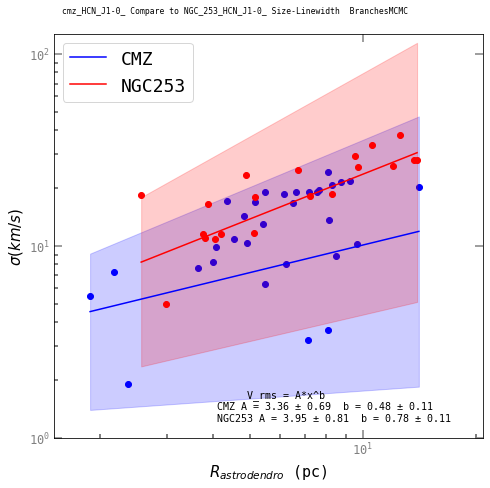

input data is of type linear fitting to powerlaw...
12.932496997718696 37.08838468424565 5.692254881860875 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.7993011599350349 4.0056408849420855
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.7993011599350349, 0.05120064050405355] [4.0056408849420855, 4.066894265500921] 0.43141907024250553 8.339441880622811
[[0.72106724 5.01041719]
 [0.72106724 5.01041719]
 [0.58895112 6.02632428]
 ...
 [0.38020339 8.80320967]
 [0.34748831 9.43663886]
 [0.34748831 9.43663886]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13COp_J1_0_
    least sq  max like      MCMC
a   0.799301  0.431419  0.456523
a-  0.051201            0.124618
a+  0.051201            0.086315
c   4.005641  8.339442  7.936589
c-  4.066894            1.343362
c+  4.066894            1.631904



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7993011599350349 0.22627558530264275 63817.83177799765 773.0854771464435 10130.733360669072
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.45652273917998715 0.3530131659511524 247235770.23092207 2174.9353740379934 86414886.88245608
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_H13COp_J1_0_ Compare to NGC_253_H13CO+_J1-0_ Size-Linewidth  BranchesMCMC

CMZ fit params and covariance error: a =  7.9365885657888064  +-  1.343362483325759 , b =  0.45652273917998715  +-  0.12461829533485586

Structures plotted:  9

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to p

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CO+_J1-0_
    least sq  max like      MCMC
a   0.701825  0.859994  0.751486
a-  0.023470            0.230265
a+  0.023470            0.231423
c   4.653455  3.168611  3.874366
c-  2.147482            2.084733
c+  2.147482            1.395493



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7018245495161805 0.15319963134964418 226610.38218688878 1058.584483898555 45025.15885345255
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7514855338410599 0.4798594552171048 42252.38967328713 31.58402767336873 7487.9983939725025
NGC253 fit params and covariance error: a =  3.8743657425824853  +-  2.084733496291962 , b =  0.7514855338410599  +-  0.23026509676125662

Structures plotted:  8



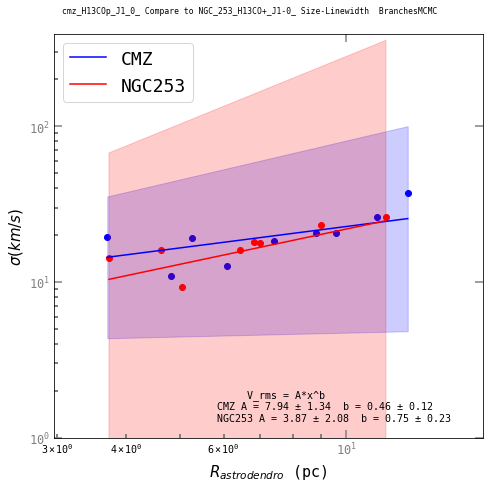

input data is of type linear fitting to powerlaw...
9.635270458584806 18.073374373968548 4.646759832183447 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.5112950983153971 5.633993822869405
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.5112950983153971, 0.03907507635438201] [5.633993822869405, 6.300534255414114] 1.0112794518099264 1.188358810138523
[[1.05438026 1.07118845]
 [1.04206755 1.10357171]
 [1.03404073 1.13274563]
 ...
 [0.98622278 1.36295757]
 [0.98612836 1.36198342]
 [1.00318862 1.31984996]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_3mm_HCO+_J1-0_
    least sq  max like      MCMC
a   0.511295  1.011279  0.857571
a-  0.039075            0.251637
a+  0.039075            0.274344
c   5.633994  1.188359  1.629693
c-  6.300534            1.211639
c+  6.300534            0.676485



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5112950983153971 0.19767416713972014 1397297.6259796007 4502.411339142558 430520.48699648876
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8575714550322613 0.5016344103811547 307.0888232415422 5.864318355706701 42.62776424082093
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_3mm_HCO+_J1-0_ Compare to NGC_253_HCO+_J1-0_ Size-Linewidth  BranchesMCMC

CMZ fit params and covariance error: a =  1.6296925551820367  +-  1.211639274675747 , b =  0.8575714550322613  +-  0.2516370816784488

Structures plotted:  13

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to po

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J1-0_
    least sq  max like      MCMC
a   0.519682  0.546783  0.522457
a-  0.008963            0.119407
a+  0.008963            0.117544
c   6.881001  6.026991  6.300246
c-  2.000820            1.585476
c+  2.000820            1.320710



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5196817892097283 0.09467242834859686 25158402.36742745 10766.02820486244 7603284.9941034205
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5224573404173312 0.3455528897238004 6648182.784668015 492.29380460368225 1996391.0351398455
NGC253 fit params and covariance error: a =  6.300245610984689  +-  1.5854760737066815 , b =  0.5224573404173312  +-  0.11940679959646894

Structures plotted:  21



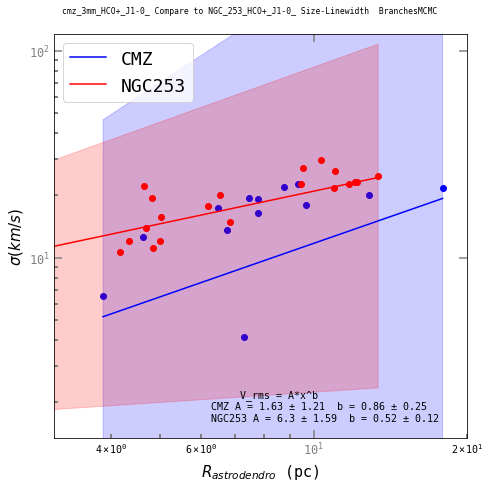

input data is of type linear fitting to powerlaw...
10.157374562991064 8.626807804332337 1.6889795489823505 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.6089127257389877 3.4497897155935067
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.6089127257389877, 0.0024577567873639056] [3.4497897155935067, 0.13890882580908367] 0.41328595026964693 2.5953149780090343
[[0.50033773 2.19153976]
 [0.50035746 2.19291841]
 [0.51041217 2.14943012]
 ...
 [0.36664079 2.85375476]
 [0.35980871 2.88432296]
 [0.37440245 2.81488027]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J3_2__
    least sq  max like      MCMC
a   0.608913  0.413286  0.411106
a-  0.002458            0.037120
a+  0.002458            0.036972
c   3.449790  2.595315  2.604889
c-  0.138909            0.174178
c+  0.138909            0.167920



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.6089127257389877 0.049575768146987956 11447.283573086639 60.514293757056315 2817.0186069476113
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.4111055937535734 0.1926666716795391 1037.5145843741445 25.441985611850516 402.6137627961697
Using MCMC fit with assumed errors, r_err =  0.1 min r = 0.8

cmz_CO_J3_2__ Compare to NGC_253_CO_J3-2_ Size-Linewidth  BranchesMCMC

CMZ fit params and covariance error: a =  2.6048886165642386  +-  0.17417815998462416 , b =  0.4111055937535734  +-  0.037120446376071314

Structures plotted:  325

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to pow

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J3-2_
    least sq  max like      MCMC
a   0.765239  0.697473  0.693583
a-  0.005541            0.052547
a+  0.005541            0.052290
c   3.645229  3.268571  3.288467
c-  0.352761            0.323358
c+  0.352761            0.302258



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.765238776371457 0.07443513213401884 25731.635364798658 144.5800549672896 4418.0295074812675
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.693583132606048 0.22923071282372873 9595.1218734311 65.12552133242714 1942.9756715723752
NGC253 fit params and covariance error: a =  3.2884673627366747  +-  0.3233575949505414 , b =  0.693583132606048  +-  0.05254671970167479

Structures plotted:  119



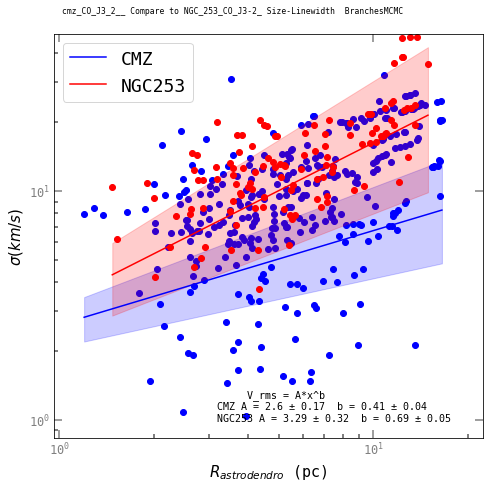

input data is of type linear fitting to powerlaw...
20.268080860021986 13.907142548990635 3.394682536217032 1.0
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.285365173608953 0.1653919937324171
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.285365173608953, 0.06293834718856159] [0.1653919937324171, 0.028122384658942564] 0.3241784479791023 2.18289829250184
[[0.32526457 2.10165601]
 [0.30580557 2.25155282]
 [0.30584934 2.2531504 ]
 ...
 [0.19338134 3.59645664]
 [0.14379587 4.12203605]
 [0.05872748 5.30047621]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J1_0_
    least sq  max like      MCMC
a   1.285365  0.324178  0.294655
a-  0.062938            0.095593
a+  0.062938            0.094589
c   0.165392  2.182898  2.418322
c-  0.028122            0.950387
c+  0.028122            0.694703



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.285365173608953 0.2508751625581169 28.233009049517783 2.1169369028170246 1.4634975297882773
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.2946553225391305 0.30918148360043574 516.3888211585382 9.158879925112153 262.0121974546605
Using MCMC fit with assumed errors, r_err =  1 min r = 9.5

cmz_CO_J1_0_ Compare to NGC_253_CO_J1-0_ Size-Linewidth  BranchesMCMC

CMZ fit params and covariance error: a =  2.4183215095027535  +-  0.9503866551648987 , b =  0.2946553225391305  +-  0.0955931898013665

Structures plotted:  65

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
37.

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J1-0_
    least sq  max like      MCMC
a   0.829316  1.433914  1.424230
a-  0.002188            0.046996
a+  0.002188            0.046017
c   1.532318  0.085512  0.089069
c-  0.113324            0.019647
c+  0.113324            0.016518



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8293160905128647 0.04677622826120382 229.95022577839268 7.746861664973143 34.065733911876876
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.4242301797177939 0.21678517027525804 32.60615687082811 5.313519663642711 1.227635486789239
NGC253 fit params and covariance error: a =  0.08906943392563257  +-  0.0196469865649872 , b =  1.4242301797177939  +-  0.046995810051272624

Structures plotted:  79



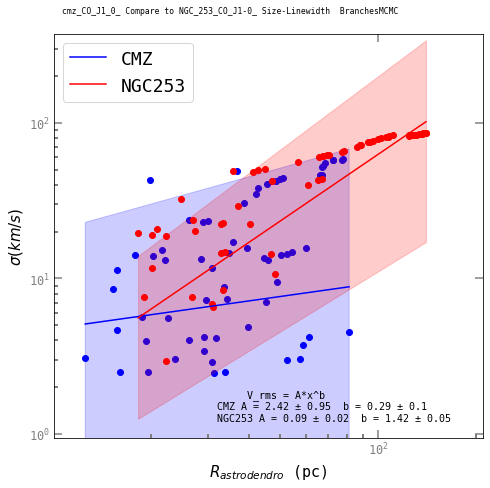

input data is of type linear fitting to powerlaw...
8.62121387031873 21.255862322673863 3.466552343623383 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.5507781602078569 5.115452536464519
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.5507781602078569, 0.5929078014849503] [5.115452536464519, 53.63718737780417] 0.2785649990413462 7.6321528287394145
[[0.70572243 3.39628278]
 [0.70572243 3.39628278]
 [0.70572243 3.39628278]
 ...
 [0.8898162  2.46577215]
 [0.8898162  2.46577215]
 [0.8898162  2.46577215]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_SiO_J2_1_
    least sq  max like      MCMC
a   0.550778  0.278565  0.332996
a-  0.592908            0.245039
a+  0.592908            0.155041
c   5.115453  7.632153  6.889544
c- 53.637187            2.108530
c+ 53.637187            2.424756



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5507781602078569 0.7700050658826539 463693.16754376114 7567.796701611381 130452.53907962563
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.3329960053346426 0.4950145664479877 16693233.876407955 209.5907863161952 7754333.4529296905
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_SiO_J2_1_ Compare to NGC_253_SiO_J2-1_ Size-Linewidth  BranchesMCMC

CMZ fit params and covariance error: a =  6.889544472664689  +-  2.1085299782709495 , b =  0.3329960053346426  +-  0.2450394209956892

Structures plotted:  5

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
8

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_SiO_J2-1_
    least sq  max like      MCMC
a   1.386975  1.609088  1.109564
a-  0.079755            0.455527
a+  0.079755            0.485277
c   1.173857  0.746148  1.875004
c-  0.431369            2.583720
c+  0.431369            1.075918



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.386975192607914 0.2824100794014319 363.77482382821194 19.168949673038785 14.92304492661845
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.109563731039973 0.6749272913845483 965.0892074050405 5.148565904408252 74.99006462943845
NGC253 fit params and covariance error: a =  1.8750037278925653  +-  2.583720155538227 , b =  1.109563731039973  +-  0.45552684865568294

Structures plotted:  4



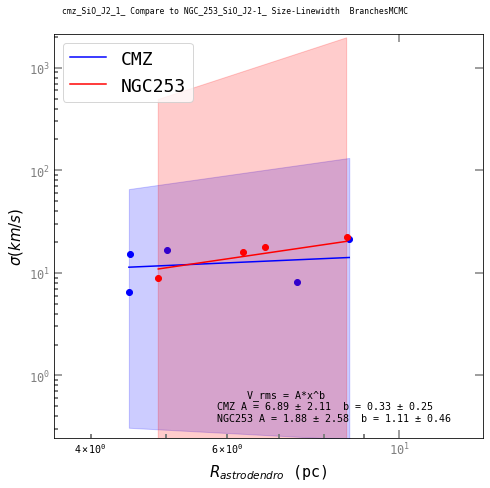

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_H13CN_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
7.724598111313055 35.128116909280955 4.748336844220261 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.8221565990628561 3.92958637883303
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.8221565990628561, 0.06757023143997835] [3.92958637883303, 4.16762925333795] 0.9513023130596443 2.5567271807261887
[[1.11885317 1.60146603]
 [1.13267854 1.52644611]
 [1.13267854 1.52644611]
 ...
 [0.9420982  2.54715468]
 [0.88433326 2.77038155]
 [0.97152369 2.4297148 ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   0.822157  0.951302  0.892893
a-  0.067570            0.177802
a+  0.067570            0.176959
c   3.929586  2.556727  2.855867
c-  4.167629            1.135107
c+  4.167629            0.833576



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8221565990628561 0.259942746465406 56460.27354003102 736.1264259921417 8503.278019888063
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8928926832678676 0.42166557050534725 5607.379046461467 23.394436129483868 717.5748868242171
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

NOT AVAILABLE Compare to NGC_253_H13CN_J4-3_ Size-Linewidth  BranchesMCMC

NGC_253_H13CN_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.5106115281142545 25.64421478800694 7.716779361685146 0.1
masking bad values ...
restricting fit to [None, None]

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J4-3_
    least sq  max like      MCMC
a  -0.859036 -0.859036  0.858163
a-       inf            0.453532
a+       inf            0.284398
c  56.547631 56.547631  6.897414
c-       inf            2.201359
c+       inf            3.003230



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -0.8590360269810285 inf 4.8819681626126867e+55 inf 3.5288318928602663e+56
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8581632075497767 0.6734480959358158 56960941.09152497 171.38571015176524 7896123.79246844
NGC253 fit params and covariance error: a =  6.897413948421017  +-  2.2013594913623376 , b =  0.8581632075497767  +-  0.4535323379195757

Structures plotted:  2



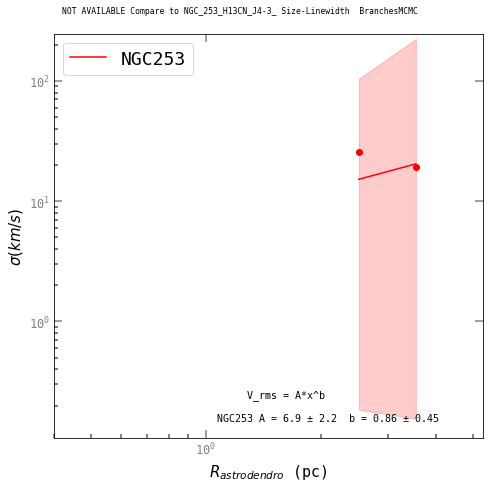

input data is of type linear fitting to powerlaw...
4.373498376264024 11.073401340669406 1.5588766882379388 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.5879833892783684 6.229312378557184
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.5879833892783684, 0.00534764640274766] [6.229312378557184, 0.7153017829993733] 0.8362716327817752 3.5012238109816423
[[1.06732246 2.24904041]
 [1.06742121 2.24247613]
 [1.04224633 2.42878431]
 ...
 [0.71339359 4.20616753]
 [0.70460408 4.26690342]
 [0.70460408 4.26690342]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J4_3_
    least sq  max like      MCMC
a   0.587983  0.836272  0.830346
a-  0.005348            0.065911
a+  0.005348            0.066761
c   6.229312  3.501224  3.526030
c-  0.715302            0.397511
c+  0.715302            0.356870



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.5879833892783684 0.07312760356218205 6565922.735088114 3288.565150986437 1695556.9391034907
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8303461938098597 0.25673179453974804 22718.341939506437 92.54916950619273 3357.6114569803176
Using MCMC fit with assumed errors, r_err =  0.1 min r = 1

cmz_HCN_J4_3_ Compare to NGC_253_HCN_J4-3_ Size-Linewidth  BranchesMCMC

CMZ fit params and covariance error: a =  3.526030438123508  +-  0.3975107285251096 , b =  0.8303461938098597  +-  0.06591121432759939

Structures plotted:  70

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw..

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J4-3_
    least sq  max like      MCMC
a   0.800126  0.925818  0.894039
a-  0.027947            0.140779
a+  0.027947            0.135379
c   5.579118  3.891395  4.115228
c-  4.120179            1.177707
c+  4.120179            0.988676



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8001255250242456 0.16717300471917984 2394660.01081649 4766.425591300069 379418.35502563074
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8940388453219047 0.37520489340450336 102156.69518870239 87.62057439131002 13038.51075456895
NGC253 fit params and covariance error: a =  4.115227989554777  +-  1.1777070120611093 , b =  0.8940388453219047  +-  0.14077871203468473

Structures plotted:  16



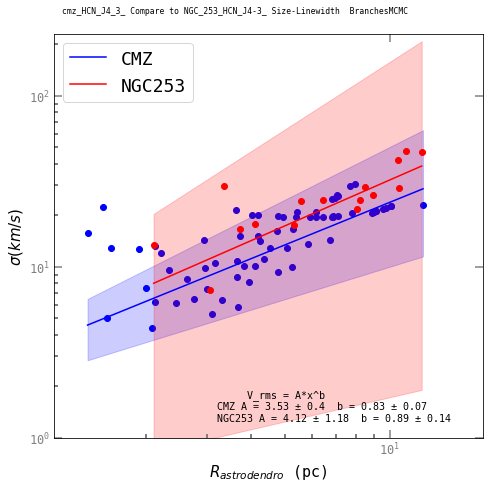

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_HCO+_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
7.724598111313055 35.128116909280955 4.748336844220261 0.1
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.8221565990628561 3.92958637883303
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.8221565990628561, 0.06757023143997835] [3.92958637883303, 4.16762925333795] 0.9513023130596443 2.5567271807261887
[[1.10149074 1.70972145]
 [1.10149074 1.70972145]
 [1.03679122 2.01547138]
 ...
 [0.73771748 3.68667818]
 [0.74718801 3.62669832]
 [0.7440202  3.69098376]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   0.822157  0.951302  0.891826
a-  0.067570            0.176067
a+  0.067570            0.179079
c   3.929586  2.556727  2.861490
c-  4.167629            1.163140
c+  4.167629            0.830218



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8221565990628561 0.259942746465406 56460.27354003102 736.1264259921417 8503.278019888063
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.8918261626802629 0.4196029135969738 5666.511241255345 23.551003575453713 726.9249779925436
Using MCMC fit with assumed errors, r_err =  0.1 min r = 0.9

NOT AVAILABLE Compare to NGC_253_HCO+_J4-3_ Size-Linewidth  BranchesMCMC

NGC_253_HCO+_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
12.076194157836447 46.09977246412976 11.543670974087746 0.1
masking bad values ...
restricting fit to [None, None]

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J4-3_
    least sq  max like      MCMC
a   0.799896  1.120989  1.102135
a-  0.016783            0.113634
a+  0.016783            0.108633
c   5.611333  2.735283  2.822198
c-  2.352071            0.663867
c+  2.352071            0.569658



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.7998960471086366 0.12954746796585312 2577680.597501009 3736.3980093739724 408632.6418904406
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.1021353243387808 0.33709700202424375 8401.036025073334 41.97792213633406 664.0450179261018
NGC253 fit params and covariance error: a =  2.8221975227025977  +-  0.6638671658850552 , b =  1.1021353243387808  +-  0.113634388773733

Structures plotted:  16



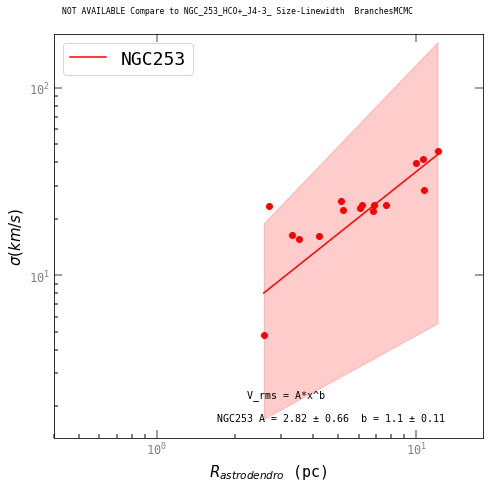

In [8]:
#BRANCHES
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="Branches",save_name=save_name,fs=8,plot_errors=plot_errors)
#with open("Result Files/LS fit results", 'wb') as file:
#    pickle.dump([fit_results_cmz,fit_results_ngc], file) #save the fit resutls as form [[cmzall[vars,covars],leaves[vars,covars],branches[vars,covars]], [same for ngc]]
with open("Result Files/MCMC fit results", 'wb') as file:
    pickle.dump([fit_results_cmz,fit_results_ngc], file) #save the fit resutls as form [[cmzall[vars,covars],leaves[vars,covars],branches[vars,covars]], [same for ngc]]


# Compare fit results for all lines

average parameters for LS fit results :
a_cmz = 2.995739850534216 +- 0.19524322995962548
b_cmz = 0.8511228487316032 +- 0.03701739880896413
a_ngc = 4.836333527176708 +- 0.29152825530282644
b_ngc = 0.7658469290003526 +- 0.040097832146573045


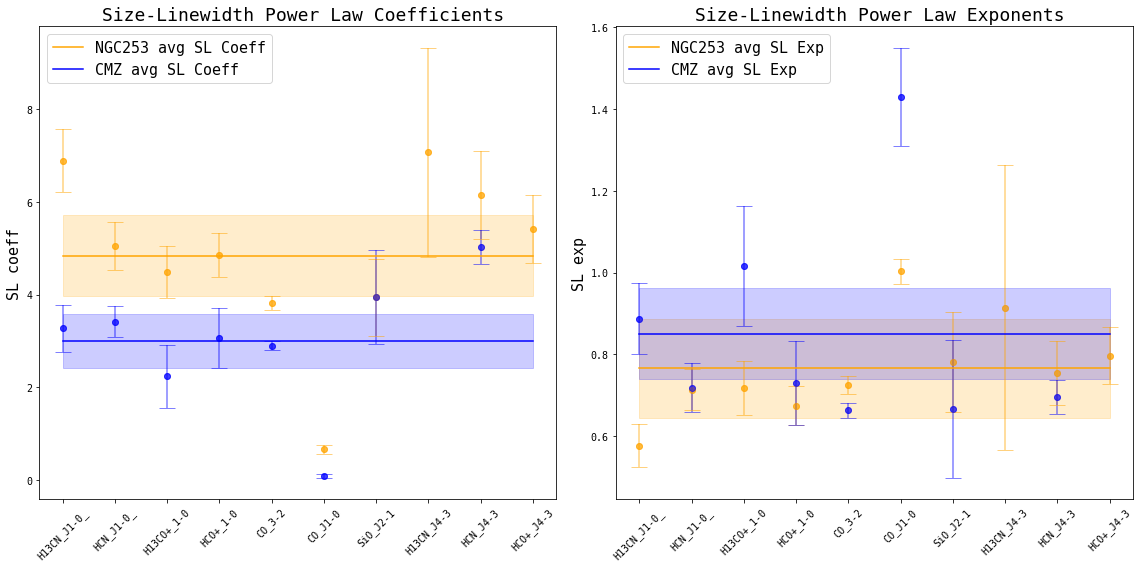

In [23]:
er_r=3
#
#All structures using least squares fit
#
#
#Compare fits for molecules


#with open("Result Files/MCMC fit results", 'rb') as file:
#    save_name="MCMC fit results"
#    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
with open("Result Files/LS fit results", 'rb') as file:
    save_name="LS fit results"
    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
    
Line_Names = ["H13CN_J1-0_","HCN_J1-0_",'H13CO+_1-0',"HCO+_1-0","CO_3-2","CO_J1-0","SiO_J2-1","H13CN_J4-3","HCN_J4-3","HCO+_J4-3"]
CMZ_has_line=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,0           ,1         ,0]#1=yess 0=no
CMZ_has_line_n=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,np.nan           ,1         ,np.nan]#1=yess 0=no

mean_c=0
mean_e=0

fig = plt.figure(1,figsize=(16,8))
axA = pylab.subplot(1,2, 1)
axA2 = pylab.subplot(1,2, 2)

#for l in range(len(fit_results_ngc)):
fit_results_ngc = fit_results_ngc[0:len(Line_Names)]#all structures
fit_results_cmz = fit_results_cmz[0:len(Line_Names)]#all structures
#fit_results_ngc = fit_results_ngc[len(Line_Names):len(Line_Names)*2]#leaves
#fit_results_cmz = fit_results_cmz[len(Line_Names):len(Line_Names)*2]#leaves
#fit_results_ngc = fit_results_ngc[len(Line_Names)*2:]#branches
#fit_results_cmz = fit_results_cmz[len(Line_Names)*2:]#branches
c1,c2,c3,c4=[],[],[],[]#for clarity, use these to store the values
n1,n2,n3,n4=[],[],[],[]#for clarity, use these to store the values
#for l in range(len(fit_results_ngc[0])):
for l in range(10):
    #num = len(fit_results_ngc[0])
    num = 10
    spacing =1 # /num +1
    #load the restults
    ngc_coeff,ngc_exp,ngc_coeff_err,ngc_exp_err = fit_results_ngc[0][l][0],fit_results_ngc[0][l][1],np.sqrt(fit_results_ngc[1][l][0][0]),np.sqrt(fit_results_ngc[1][l][1][1])
    cmz_coeff,cmz_exp,cmz_coeff_err,cmz_exp_err = fit_results_cmz[0][l][0],fit_results_cmz[0][l][1],np.sqrt(fit_results_cmz[1][l][0][0]),np.sqrt(fit_results_cmz[1][l][1][1])
    if CMZ_has_line[l]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=np.nan,np.nan,np.nan,np.nan

    #plots exp
    axA2.scatter(spacing*l,ngc_exp,color='orange',alpha=.5)
    axA2.errorbar(spacing*l,ngc_exp, yerr= ngc_exp_err, fmt="o",capsize=8,color='orange',alpha=.5)
    axA2.scatter(spacing*l,cmz_exp,color='blue',alpha=.5)
    axA2.errorbar(spacing*l,cmz_exp, yerr= cmz_exp_err, fmt="o",capsize=8,color='blue',alpha=.5)
    #plots coeff
    axA.scatter(spacing*l,ngc_coeff,color='orange',alpha=.5)
    axA.errorbar(spacing*l,ngc_coeff, yerr= ngc_coeff_err, fmt="o",capsize=8,color='orange',alpha=.5)
    axA.scatter(spacing*l,cmz_coeff,color='blue',alpha=.5)
    axA.errorbar(spacing*l,cmz_coeff, yerr= cmz_coeff_err, fmt="o",capsize=8,color='blue',alpha=.5)
    
    if CMZ_has_line[l]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=0,0,0,0 #set to zero for simplicifty
    c1.append(cmz_coeff), c2.append(cmz_exp), c3.append(cmz_coeff_err), c4.append(cmz_exp_err)
    n1.append(ngc_coeff), n2.append(ngc_exp), n3.append(ngc_coeff_err), n4.append(ngc_exp_err)
#    
#make averages
avg_cmz_coeff = np.dot(c1,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_cmz_exp = np.dot(c2,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_ngc_coeff = np.mean(n1)
avg_ngc_exp = np.mean(n2)
#########
#propagate errors to mean (sum square; take square root, divide by n)
avg_cmz_coeff_err = np.sqrt(np.sum(err**2 for err in np.array(c3)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_cmz_exp_err = np.sqrt(np.sum(err**2 for err in np.array(c4)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_ngc_coeff_err = np.sqrt(np.sum(err**2 for err in n3))/len(Line_Names)#
avg_ngc_exp_err = np.sqrt(np.sum(err**2 for err in n4))/len(Line_Names)#


#n = range(len(fit_results_ngc))#0 to 9
n = range(10)#0 to 9
err_r = 3 #the sigma to plot
axA.plot(n,np.full(len(n),avg_ngc_coeff),color="orange",label="NGC253 avg SL Coeff")
axA.plot(n,np.full(len(n),avg_cmz_coeff),color="blue",label="CMZ avg SL Coeff")
axA2.plot(n,np.full(len(n),avg_ngc_exp),color="orange",label="NGC253 avg SL Exp")
axA2.plot(n,np.full(len(n),avg_cmz_exp),color="blue",label="CMZ avg SL Exp")

axA.fill_between(n,np.full(len(n),avg_ngc_coeff+err_r*avg_ngc_coeff_err),np.full(len(n),avg_ngc_coeff-er_r*avg_ngc_coeff_err),color="orange",alpha=.2)
axA.fill_between(n,np.full(len(n),avg_cmz_coeff+err_r*avg_cmz_coeff_err),np.full(len(n),avg_cmz_coeff-er_r*avg_cmz_coeff_err),color="blue",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_ngc_exp+err_r*avg_ngc_exp_err),np.full(len(n),avg_ngc_exp-er_r*avg_ngc_exp_err),color="orange",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_cmz_exp+err_r*avg_cmz_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_cmz_exp_err),color="blue",alpha=.2)

print("average parameters for",save_name,":")
print("a_cmz =",avg_cmz_coeff,"+-",avg_cmz_coeff_err)
print("b_cmz =",avg_cmz_exp,"+-",avg_cmz_exp_err)
print("a_ngc =",avg_ngc_coeff,"+-",avg_ngc_coeff_err)
print("b_ngc =",avg_ngc_exp,"+-",avg_ngc_exp_err)
#set line labels
axA.set_xticks(n)
axA.set_xticklabels(Line_Names, rotation=45)
axA2.set_xticks(n)
axA2.set_xticklabels(Line_Names, rotation=45)


axA.set_ylabel('SL coeff',fontsize=15)
axA2.set_ylabel('SL exp',fontsize=15)


axA.set_title(" Size-Linewidth Power Law Coefficients", fontsize=18)
axA2.set_title(" Size-Linewidth Power Law Exponents", fontsize=18)

axA.legend(loc='upper left',fontsize=15,)
axA2.legend(loc='upper left',fontsize=15,)


plt.tight_layout()  # avoids label cutoff


fig.savefig(bbox_inches='tight',fname="Plots/Pngs/"+save_name+" all lines.png")
fig.savefig(bbox_inches='tight',fname="Plots/"+save_name+" all lines.pdf")
pylab.show()

average parameters for LS fit results leaves Leaves :
a_cmz = 4.266553793984947 +- 0.41675942087300105
b_cmz = 0.39145432667425584 +- 0.06506166086834271
a_ngc = 4.851158566579013 +- 0.3558885544542027
b_ngc = 0.7232792160937939 +- 0.06471390466609575


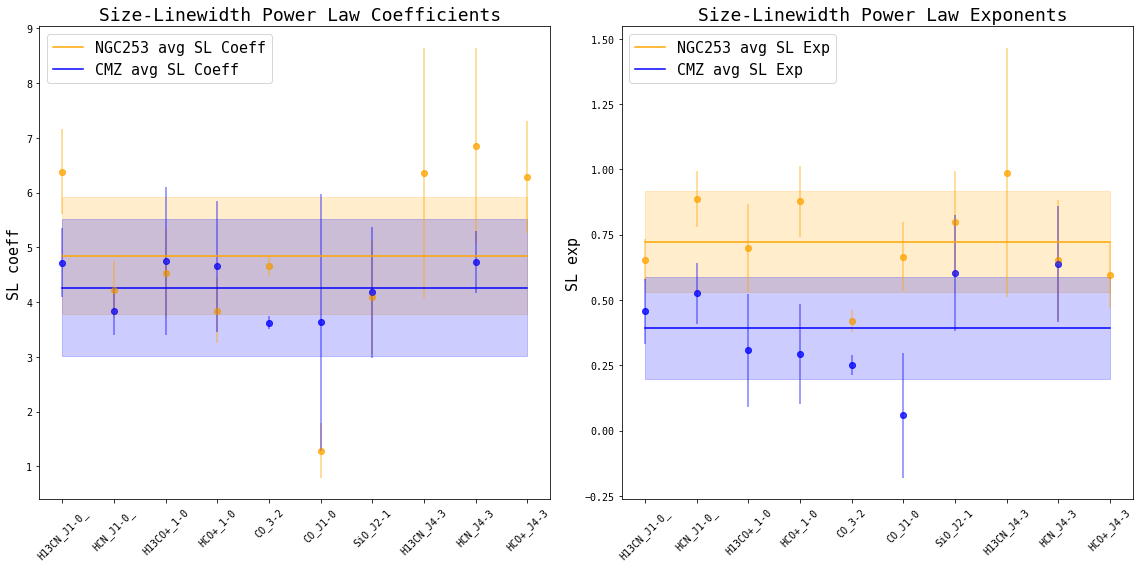

In [24]:
#
#Leaves Using least squares fit results
#
#
#Compare fits for molecules


#with open("Result Files/MCMC fit results", 'rb') as file:
#    save_name="MCMC fit results"
#    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
with open("Result Files/LS fit results", 'rb') as file:
    save_name="LS fit results leaves"
    fit_results_cmz,fit_results_ngc = pickle.load(file)

    
Line_Names = ["H13CN_J1-0_","HCN_J1-0_",'H13CO+_1-0',"HCO+_1-0","CO_3-2","CO_J1-0","SiO_J2-1","H13CN_J4-3","HCN_J4-3","HCO+_J4-3"]
CMZ_has_line=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,0           ,1         ,0]#1=yess 0=no

mean_c=0
mean_e=0

fig = plt.figure(1,figsize=(16,8))
axA = pylab.subplot(1,2, 1)
axA2 = pylab.subplot(1,2, 2)


c1,c2,c3,c4=[],[],[],[]#for clarity, use these to store the values
n1,n2,n3,n4=[],[],[],[]#for clarity, use these to store the values
save_name+=" Leaves"
r=(10,20)
lmo=0
for l in range(r[0],r[1]):
    #num = len(fit_results_ngc[0])
    num = 10
    spacing =1 # /num +1
    #load the restults
    ngc_coeff,ngc_exp,ngc_coeff_err,ngc_exp_err = fit_results_ngc[0][l][0],fit_results_ngc[0][l][1],np.sqrt(fit_results_ngc[1][l][0][0]),np.sqrt(fit_results_ngc[1][l][1][1])
    cmz_coeff,cmz_exp,cmz_coeff_err,cmz_exp_err = fit_results_cmz[0][l][0],fit_results_cmz[0][l][1],np.sqrt(fit_results_cmz[1][l][0][0]),np.sqrt(fit_results_cmz[1][l][1][1])
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=np.nan,np.nan,np.nan,np.nan

    #plots exp
    axA2.scatter(spacing*l,ngc_exp,color='orange',alpha=.5)
    axA2.errorbar(spacing*l,ngc_exp, yerr= ngc_exp_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA2.scatter(spacing*l,cmz_exp,color='blue',alpha=.5)
    axA2.errorbar(spacing*l,cmz_exp, yerr= cmz_exp_err, fmt="o",capsize=0,color='blue',alpha=.5)
    #plots coeff
    axA.scatter(spacing*l,ngc_coeff,color='orange',alpha=.5)
    axA.errorbar(spacing*l,ngc_coeff, yerr= ngc_coeff_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA.scatter(spacing*l,cmz_coeff,color='blue',alpha=.5)
    axA.errorbar(spacing*l,cmz_coeff, yerr= cmz_coeff_err, fmt="o",capsize=0,color='blue',alpha=.5)
    
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=0,0,0,0 #set to zero for simplicifty
    c1.append(cmz_coeff), c2.append(cmz_exp), c3.append(cmz_coeff_err), c4.append(cmz_exp_err)
    n1.append(ngc_coeff), n2.append(ngc_exp), n3.append(ngc_coeff_err), n4.append(ngc_exp_err)
    lmo+=1
#    
#make averages
avg_cmz_coeff = np.dot(c1,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_cmz_exp = np.dot(c2,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_ngc_coeff = np.mean(n1)
avg_ngc_exp = np.mean(n2)
#propagate errors to mean (sum square; take square root, divide by n)
avg_cmz_coeff_err = np.sqrt(np.sum(err**2 for err in np.array(c3)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_cmz_exp_err = np.sqrt(np.sum(err**2 for err in np.array(c4)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_ngc_coeff_err = np.sqrt(np.sum(err**2 for err in n3))/len(Line_Names)#
avg_ngc_exp_err = np.sqrt(np.sum(err**2 for err in n4))/len(Line_Names)#


#n = range(len(fit_results_ngc))#0 to 9
n = range(r[0],r[1])
err_r = 3 #the sigma to plot
axA.plot(n,np.full(len(n),avg_ngc_coeff),color="orange",label="NGC253 avg SL Coeff")
axA.plot(n,np.full(len(n),avg_cmz_coeff),color="blue",label="CMZ avg SL Coeff")
axA2.plot(n,np.full(len(n),avg_ngc_exp),color="orange",label="NGC253 avg SL Exp")
axA2.plot(n,np.full(len(n),avg_cmz_exp),color="blue",label="CMZ avg SL Exp")

axA.fill_between(n,np.full(len(n),avg_ngc_coeff+err_r*avg_ngc_coeff_err),np.full(len(n),avg_ngc_coeff-er_r*avg_ngc_coeff_err),color="orange",alpha=.2)
axA.fill_between(n,np.full(len(n),avg_cmz_coeff+err_r*avg_cmz_coeff_err),np.full(len(n),avg_cmz_coeff-er_r*avg_cmz_coeff_err),color="blue",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_ngc_exp+err_r*avg_ngc_exp_err),np.full(len(n),avg_ngc_exp-er_r*avg_ngc_exp_err),color="orange",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_cmz_exp+err_r*avg_cmz_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_cmz_exp_err),color="blue",alpha=.2)
print("average parameters for",save_name,":")
print("a_cmz =",avg_cmz_coeff,"+-",avg_cmz_coeff_err)
print("b_cmz =",avg_cmz_exp,"+-",avg_cmz_exp_err)
print("a_ngc =",avg_ngc_coeff,"+-",avg_ngc_coeff_err)
print("b_ngc =",avg_ngc_exp,"+-",avg_ngc_exp_err)

#set line labels
axA.set_xticks(n)
axA.set_xticklabels(Line_Names, rotation=45)
axA2.set_xticks(n)
axA2.set_xticklabels(Line_Names, rotation=45)


axA.set_ylabel('SL coeff',fontsize=15)
axA2.set_ylabel('SL exp',fontsize=15)


axA.set_title(" Size-Linewidth Power Law Coefficients", fontsize=18)
axA2.set_title(" Size-Linewidth Power Law Exponents", fontsize=18)

axA.legend(loc='upper left',fontsize=15,)
axA2.legend(loc='upper left',fontsize=15,)


plt.tight_layout()  # avoids label cutoff


fig.savefig(bbox_inches='tight',fname="Plots/Pngs/"+save_name+" all lines.png")
fig.savefig(bbox_inches='tight',fname="Plots/"+save_name+" all lines.pdf")
pylab.show()

average parameters for MCMC fit results leaves Leaves :
a_cmz = 3.1248208830895434 +- 0.2466043617318362
b_cmz = 0.3832275827762919 +- 0.042698414547036184
a_ngc = 3.4222747499607813 +- 0.24122560154074715
b_ngc = 0.8912171530896783 +- 0.049236004130323995


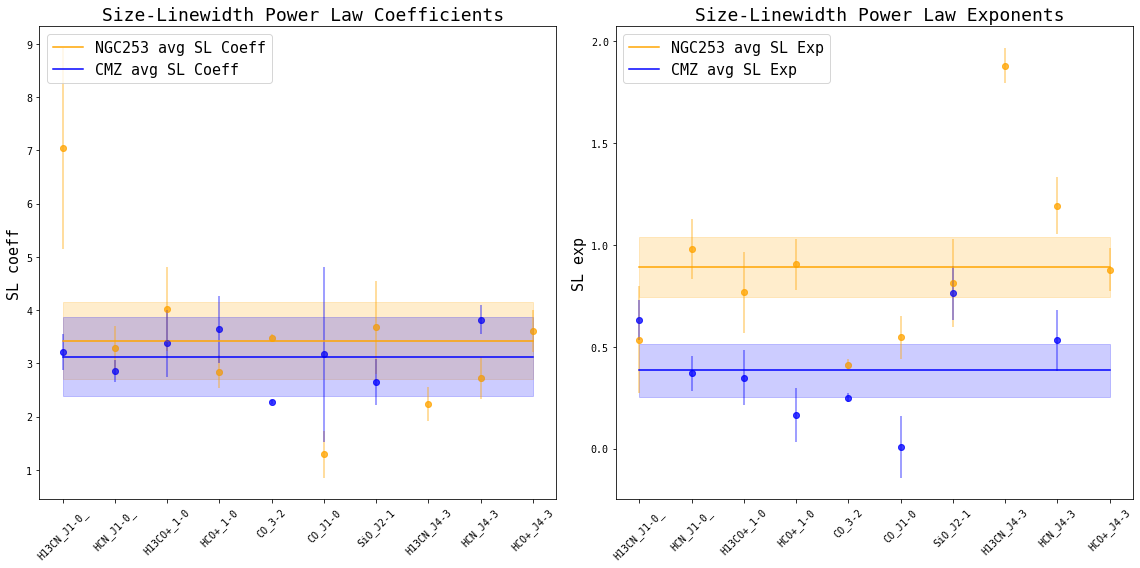

In [11]:
er_r=3
#
#Leaves
#
#
#Compare fits for molecules


#with open("Result Files/MCMC fit results", 'rb') as file:
#    save_name="MCMC fit results"
#    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
with open("Result Files/MCMC fit results", 'rb') as file:
    save_name="MCMC fit results leaves"
    fit_results_cmz,fit_results_ngc = pickle.load(file)

    
Line_Names = ["H13CN_J1-0_","HCN_J1-0_",'H13CO+_1-0',"HCO+_1-0","CO_3-2","CO_J1-0","SiO_J2-1","H13CN_J4-3","HCN_J4-3","HCO+_J4-3"]
CMZ_has_line=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,0           ,1         ,0]#1=yess 0=no

mean_c=0
mean_e=0

fig = plt.figure(1,figsize=(16,8))
axA = pylab.subplot(1,2, 1)
axA2 = pylab.subplot(1,2, 2)


c1,c2,c3,c4=[],[],[],[]#for clarity, use these to store the values
n1,n2,n3,n4=[],[],[],[]#for clarity, use these to store the values
save_name+=" Leaves"
r=(10,20)
lmo=0
for l in range(r[0],r[1]):
    #num = len(fit_results_ngc[0])
    num = 10
    spacing =1 # /num +1
    #load the restults
    ngc_coeff,ngc_exp,ngc_coeff_err,ngc_exp_err = fit_results_ngc[0][l][0],fit_results_ngc[0][l][1],np.sqrt(fit_results_ngc[1][l][0][0]),np.sqrt(fit_results_ngc[1][l][1][1])
    cmz_coeff,cmz_exp,cmz_coeff_err,cmz_exp_err = fit_results_cmz[0][l][0],fit_results_cmz[0][l][1],np.sqrt(fit_results_cmz[1][l][0][0]),np.sqrt(fit_results_cmz[1][l][1][1])
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=np.nan,np.nan,np.nan,np.nan

    #plots exp
    axA2.scatter(spacing*l,ngc_exp,color='orange',alpha=.5)
    axA2.errorbar(spacing*l,ngc_exp, yerr= ngc_exp_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA2.scatter(spacing*l,cmz_exp,color='blue',alpha=.5)
    axA2.errorbar(spacing*l,cmz_exp, yerr= cmz_exp_err, fmt="o",capsize=0,color='blue',alpha=.5)
    #plots coeff
    axA.scatter(spacing*l,ngc_coeff,color='orange',alpha=.5)
    axA.errorbar(spacing*l,ngc_coeff, yerr= ngc_coeff_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA.scatter(spacing*l,cmz_coeff,color='blue',alpha=.5)
    axA.errorbar(spacing*l,cmz_coeff, yerr= cmz_coeff_err, fmt="o",capsize=0,color='blue',alpha=.5)
    
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=0,0,0,0 #set to zero for simplicifty
    c1.append(cmz_coeff), c2.append(cmz_exp), c3.append(cmz_coeff_err), c4.append(cmz_exp_err)
    n1.append(ngc_coeff), n2.append(ngc_exp), n3.append(ngc_coeff_err), n4.append(ngc_exp_err)
    lmo+=1
#    
#make averages
avg_cmz_coeff = np.dot(c1,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_cmz_exp = np.dot(c2,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_ngc_coeff = np.mean(n1)
avg_ngc_exp = np.mean(n2)
#propagate errors to mean (sum square; take square root, divide by n)
avg_cmz_coeff_err = np.sqrt(np.sum(err**2 for err in np.array(c3)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_cmz_exp_err = np.sqrt(np.sum(err**2 for err in np.array(c4)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_ngc_coeff_err = np.sqrt(np.sum(err**2 for err in n3))/len(Line_Names)#
avg_ngc_exp_err = np.sqrt(np.sum(err**2 for err in n4))/len(Line_Names)#


#n = range(len(fit_results_ngc))#0 to 9
n = range(r[0],r[1])
err_r = 3 #the sigma to plot
axA.plot(n,np.full(len(n),avg_ngc_coeff),color="orange",label="NGC253 avg SL Coeff")
axA.plot(n,np.full(len(n),avg_cmz_coeff),color="blue",label="CMZ avg SL Coeff")
axA2.plot(n,np.full(len(n),avg_ngc_exp),color="orange",label="NGC253 avg SL Exp")
axA2.plot(n,np.full(len(n),avg_cmz_exp),color="blue",label="CMZ avg SL Exp")

axA.fill_between(n,np.full(len(n),avg_ngc_coeff+err_r*avg_ngc_coeff_err),np.full(len(n),avg_ngc_coeff-er_r*avg_ngc_coeff_err),color="orange",alpha=.2)
axA.fill_between(n,np.full(len(n),avg_cmz_coeff+err_r*avg_cmz_coeff_err),np.full(len(n),avg_cmz_coeff-er_r*avg_cmz_coeff_err),color="blue",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_ngc_exp+err_r*avg_ngc_exp_err),np.full(len(n),avg_ngc_exp-er_r*avg_ngc_exp_err),color="orange",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_cmz_exp+err_r*avg_cmz_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_cmz_exp_err),color="blue",alpha=.2)
print("average parameters for",save_name,":")
print("a_cmz =",avg_cmz_coeff,"+-",avg_cmz_coeff_err)
print("b_cmz =",avg_cmz_exp,"+-",avg_cmz_exp_err)
print("a_ngc =",avg_ngc_coeff,"+-",avg_ngc_coeff_err)
print("b_ngc =",avg_ngc_exp,"+-",avg_ngc_exp_err)

#set line labels
axA.set_xticks(n)
axA.set_xticklabels(Line_Names, rotation=45)
axA2.set_xticks(n)
axA2.set_xticklabels(Line_Names, rotation=45)


axA.set_ylabel('SL coeff',fontsize=15)
axA2.set_ylabel('SL exp',fontsize=15)


axA.set_title(" Size-Linewidth Power Law Coefficients", fontsize=18)
axA2.set_title(" Size-Linewidth Power Law Exponents", fontsize=18)

axA.legend(loc='upper left',fontsize=15,)
axA2.legend(loc='upper left',fontsize=15,)


plt.tight_layout()  # avoids label cutoff


fig.savefig(bbox_inches='tight',fname="Plots/Pngs/"+save_name+" all lines.png")
fig.savefig(bbox_inches='tight',fname="Plots/"+save_name+" all lines.pdf")
pylab.show()

average parameters for MCMC fit results ALL structures ALL :
a_cmz = 2.3672714028613173 +- 0.09543980470088415
b_cmz = 0.6838943657374609 +- 0.025467118529553814
a_ngc = 3.3403422829372253 +- 0.19793895953850568
b_ngc = 0.958097689517278 +- 0.026833216918975843


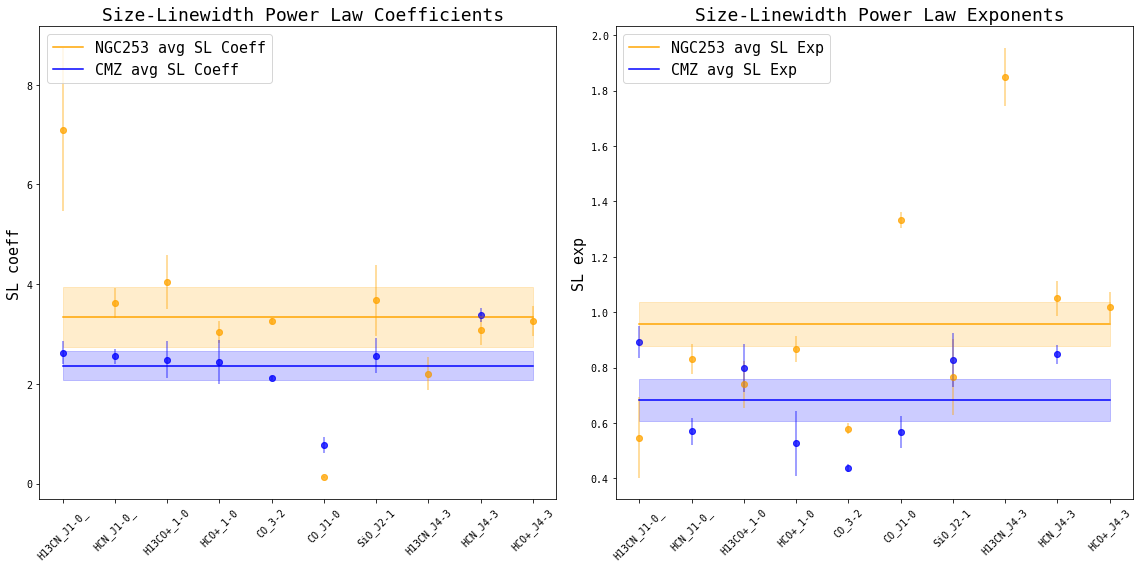

In [12]:
er_r=3
#
#All structures wit MCMC fit rseults
#
#
#Compare fits for molecules


#with open("Result Files/MCMC fit results", 'rb') as file:
#    save_name="MCMC fit results"
#    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
with open("Result Files/MCMC fit results", 'rb') as file:
    save_name="MCMC fit results ALL structures"
    fit_results_cmz,fit_results_ngc = pickle.load(file)

    
Line_Names = ["H13CN_J1-0_","HCN_J1-0_",'H13CO+_1-0',"HCO+_1-0","CO_3-2","CO_J1-0","SiO_J2-1","H13CN_J4-3","HCN_J4-3","HCO+_J4-3"]
CMZ_has_line=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,0           ,1         ,0]#1=yess 0=no

mean_c=0
mean_e=0

fig = plt.figure(1,figsize=(16,8))
axA = pylab.subplot(1,2, 1)
axA2 = pylab.subplot(1,2, 2)


c1,c2,c3,c4=[],[],[],[]#for clarity, use these to store the values
n1,n2,n3,n4=[],[],[],[]#for clarity, use these to store the values
save_name+=" ALL"
r=(0,10)
lmo=0
for l in range(r[0],r[1]):
    #num = len(fit_results_ngc[0])
    num = 10
    spacing =1 # /num +1
    #load the restults
    ngc_coeff,ngc_exp,ngc_coeff_err,ngc_exp_err = fit_results_ngc[0][l][0],fit_results_ngc[0][l][1],np.sqrt(fit_results_ngc[1][l][0][0]),np.sqrt(fit_results_ngc[1][l][1][1])
    cmz_coeff,cmz_exp,cmz_coeff_err,cmz_exp_err = fit_results_cmz[0][l][0],fit_results_cmz[0][l][1],np.sqrt(fit_results_cmz[1][l][0][0]),np.sqrt(fit_results_cmz[1][l][1][1])
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=np.nan,np.nan,np.nan,np.nan

    #plots exp
    axA2.scatter(spacing*l,ngc_exp,color='orange',alpha=.5)
    axA2.errorbar(spacing*l,ngc_exp, yerr= ngc_exp_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA2.scatter(spacing*l,cmz_exp,color='blue',alpha=.5)
    axA2.errorbar(spacing*l,cmz_exp, yerr= cmz_exp_err, fmt="o",capsize=0,color='blue',alpha=.5)
    #plots coeff
    axA.scatter(spacing*l,ngc_coeff,color='orange',alpha=.5)
    axA.errorbar(spacing*l,ngc_coeff, yerr= ngc_coeff_err, fmt="o",capsize=0,color='orange',alpha=.5)
    axA.scatter(spacing*l,cmz_coeff,color='blue',alpha=.5)
    axA.errorbar(spacing*l,cmz_coeff, yerr= cmz_coeff_err, fmt="o",capsize=0,color='blue',alpha=.5)
    
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=0,0,0,0 #set to zero for simplicifty
    c1.append(cmz_coeff), c2.append(cmz_exp), c3.append(cmz_coeff_err), c4.append(cmz_exp_err)
    n1.append(ngc_coeff), n2.append(ngc_exp), n3.append(ngc_coeff_err), n4.append(ngc_exp_err)
    lmo+=1
#    
#make averages
avg_cmz_coeff = np.dot(c1,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_cmz_exp = np.dot(c2,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_ngc_coeff = np.mean(n1)
avg_ngc_exp = np.mean(n2)
#propagate errors to mean (sum square; take square root, divide by n)
avg_cmz_coeff_err = np.sqrt(np.sum(err**2 for err in np.array(c3)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_cmz_exp_err = np.sqrt(np.sum(err**2 for err in np.array(c4)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_ngc_coeff_err = np.sqrt(np.sum(err**2 for err in n3))/len(Line_Names)#
avg_ngc_exp_err = np.sqrt(np.sum(err**2 for err in n4))/len(Line_Names)#


#n = range(len(fit_results_ngc))#0 to 9
n = range(r[0],r[1])
err_r = 3 #the sigma to plot
axA.plot(n,np.full(len(n),avg_ngc_coeff),color="orange",label="NGC253 avg SL Coeff")
axA.plot(n,np.full(len(n),avg_cmz_coeff),color="blue",label="CMZ avg SL Coeff")
axA2.plot(n,np.full(len(n),avg_ngc_exp),color="orange",label="NGC253 avg SL Exp")
axA2.plot(n,np.full(len(n),avg_cmz_exp),color="blue",label="CMZ avg SL Exp")

axA.fill_between(n,np.full(len(n),avg_ngc_coeff+err_r*avg_ngc_coeff_err),np.full(len(n),avg_ngc_coeff-er_r*avg_ngc_coeff_err),color="orange",alpha=.2)
axA.fill_between(n,np.full(len(n),avg_cmz_coeff+err_r*avg_cmz_coeff_err),np.full(len(n),avg_cmz_coeff-er_r*avg_cmz_coeff_err),color="blue",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_ngc_exp+err_r*avg_ngc_exp_err),np.full(len(n),avg_ngc_exp-er_r*avg_ngc_exp_err),color="orange",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_cmz_exp+err_r*avg_cmz_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_cmz_exp_err),color="blue",alpha=.2)
print("average parameters for",save_name,":")
print("a_cmz =",avg_cmz_coeff,"+-",avg_cmz_coeff_err)
print("b_cmz =",avg_cmz_exp,"+-",avg_cmz_exp_err)
print("a_ngc =",avg_ngc_coeff,"+-",avg_ngc_coeff_err)
print("b_ngc =",avg_ngc_exp,"+-",avg_ngc_exp_err)

#set line labels
axA.set_xticks(n)
axA.set_xticklabels(Line_Names, rotation=45)
axA2.set_xticks(n)
axA2.set_xticklabels(Line_Names, rotation=45)


axA.set_ylabel('SL coeff',fontsize=15)
axA2.set_ylabel('SL exp',fontsize=15)


axA.set_title(" Size-Linewidth Power Law Coefficients", fontsize=18)
axA2.set_title(" Size-Linewidth Power Law Exponents", fontsize=18)

axA.legend(loc='upper left',fontsize=15,)
axA2.legend(loc='upper left',fontsize=15,)


plt.tight_layout()  # avoids label cutoff


fig.savefig(bbox_inches='tight',fname="Plots/Pngs/"+save_name+" all lines.png")
fig.savefig(bbox_inches='tight',fname="Plots/"+save_name+" all lines.pdf")
pylab.show()